# A Summary of "Protracted Growth Impedes the Detection of Sexual Dimorphism in Non-Avian Dinosaurs"

## Introduction

In this post, I'd like to examine the Hone and Mallon paper "Protracted Growth Impedes the Detection of Sexual Dimorphism in Non-Avian Dinosaurs". In short, this paper examines one (of many) difficulties with discovering sexual dimorphism in dinosaurs - namely, the fact that as far as we can tell, many of them showed indeterminate growth (they kept growing throughout their lives). This means that, for instance, if males on average grew larger, than if you find a medium-sized individual is is difficult to say whether it is an older female or a younger male.

In the paper, they look at the growth curves for the greater rhea (*Rhea americana albescens*) and the common alligator (*Aliigator mississipiensis*) because together these form an extant phylogenetic bracket for the non-avian dinosaurs and both have well-studied growth curves. In addition, both of these exhibit a fairly large degree of sexual size dimorphism, with rhea males being about 128% the size of the females and alligator males being about 136% the size of the females.

The authors looked at a few different scenarios in order to determine whether or not they would be able to confidently recover sexual size dimorphism from the populations, including:
- Sampling from the population as a whole
- Sampling from the population when accounting for the population struture (basically, more juveniles than adults)
- Sampling from the population and accounting for taphonomic size bias (smaller individuals less likely to be preserved)

## Original Population Information

The data on the rhea populations was gathered from (Navarro et. al. 2005), where it was found that the growth curves for the male and female rheas followed a [Gompertz curve](https://en.wikipedia.org/wiki/Gompertz_function),

$$
f(t) = ae^{-be^{-ct}}
$$.

The Gompertz function is very similar to the standard logistic, but the growth on the left hand is much more rapid than that on the right (that is, the curve leaves the left asymptote quickly but approaches the right asymptote slowly).


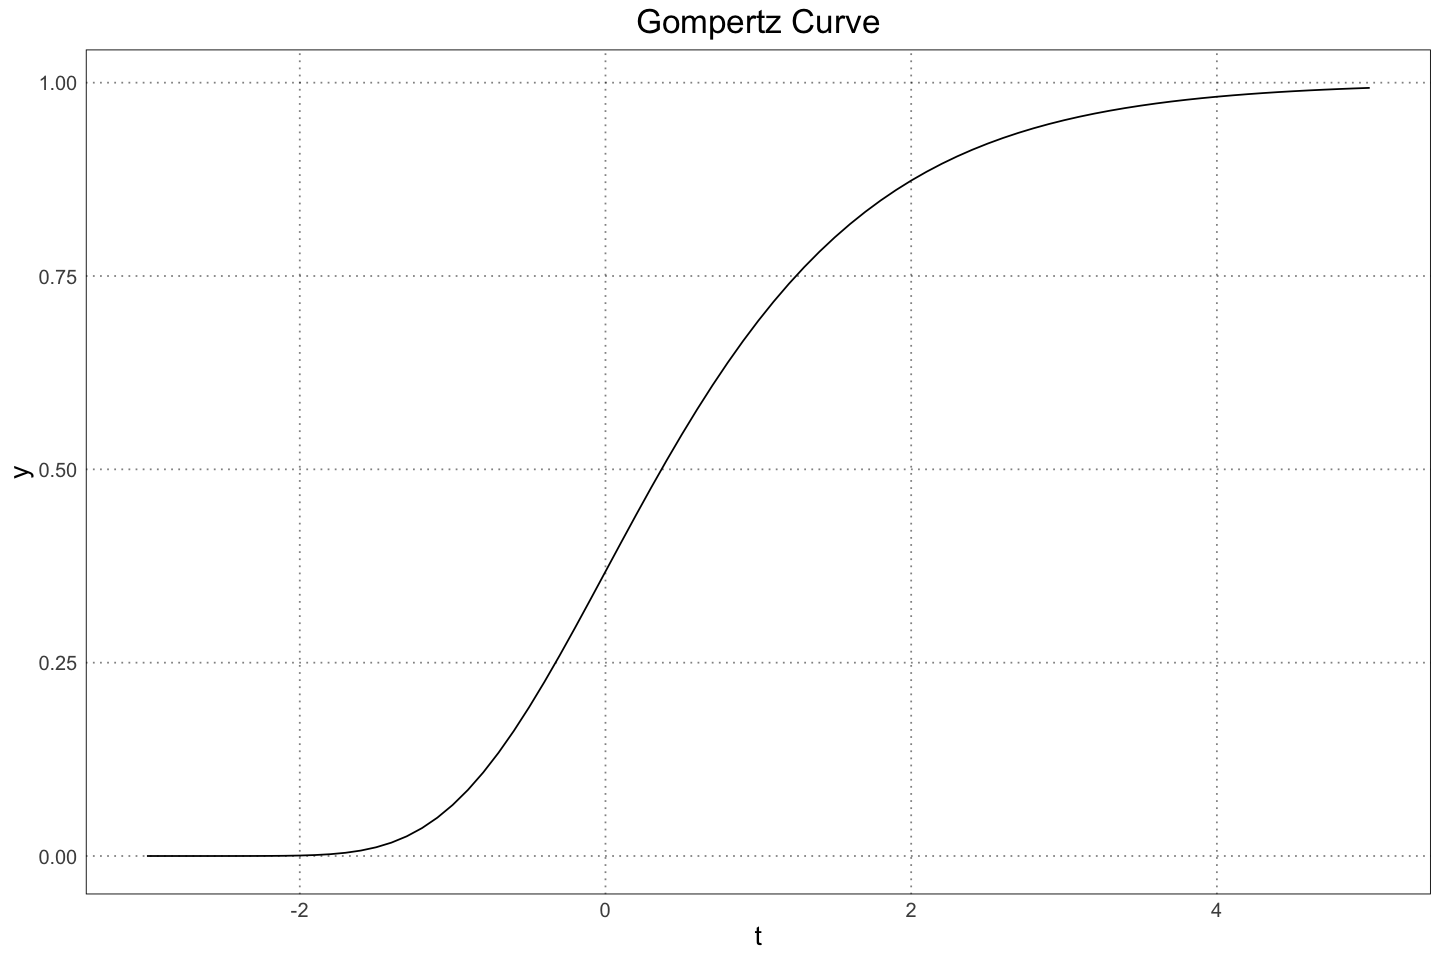

In [3]:
library(ggplot2)
options(repr.plot.width=12, repr.plot.height=8)
custom_theme <- function() {
  theme_minimal() +
    theme(
      panel.background = element_rect(fill = "white"),
      panel.grid.major = element_line(color = alpha("black", 0.5), linetype = "dotted", linewidth = 0.5),
      panel.grid.minor = element_blank(),
      axis.text = element_text(size = 12),  # Adjust the font size of axis labels
      axis.title = element_text(size = 16),  # Adjust the font size of axis titles
      plot.title = element_text(size = 20, hjust = 0.5),  # Adjust the font size and center the plot title
      plot.subtitle = element_text(size = 16, hjust = 0.5)  # Adjust the font size and center the plot subtitle
    )
}


t <- seq(-3, 5, by=0.1)
gompertz <- function(t, a=1, b=1, c=1) {
    a * exp(-b * exp(-c * t))
}
y <- gompertz(t)

ggplot(data.frame(t=t, y=y), aes(t, y)) +
    geom_line() +
    labs(title="Gompertz Curve") +
    custom_theme()

The male and female masses and standard deviations as a function of time / mass were found to be

$$
\begin{align*}
M_m(t) &= 0.3544 + 28.7063 e ^ {-e^{-10.85(t - 0.37369863)}} \\
\sigma_{M_m} &= 0.425 \log (M_m) + 0.474 \\
M_f(t) &= 0.3544 + 22.5074 e ^ {-e^{-12.12(t - 0.32191781)}} \\
\sigma_{M_f} &= 0.6793\log (M_f) + 0.7378\\
\end{align*}
$$

In [4]:
RHEA_MAX_LIFESPAN <- 10.5
rhea_male_size <- function(t) {
    0.3544 + 28.7063 * exp(-exp(-10.85 * (t - 0.37369863)))
}
rhea_male_sigma <- function(M_m) {
    0.425 * log(M_m) + 0.474
}
rhea_female_size <- function(t) {
    0.3544 + 22.5074 * exp(-exp(-12.12 * (t - 0.32191781)))
}
rhea_female_sigma <- function(M_f) {
    0.6793 * log(M_f) + 0.7378
}
t <- seq(0, RHEA_MAX_LIFESPAN, by=0.1)
M_m <- rhea_male_size(t)
M_f <- rhea_female_size(t)

plot_df <- data.frame(
    t = rep(t, 2),
    mass = c(M_m, M_f),
    sex = rep(c("M", "F"), each=length(t)),
    lower = c(M_m - rhea_male_sigma(M_m), M_f - rhea_female_sigma(M_f)),
    upper = c(M_m + rhea_male_sigma(M_m), M_f + rhea_female_sigma(M_f))
    )

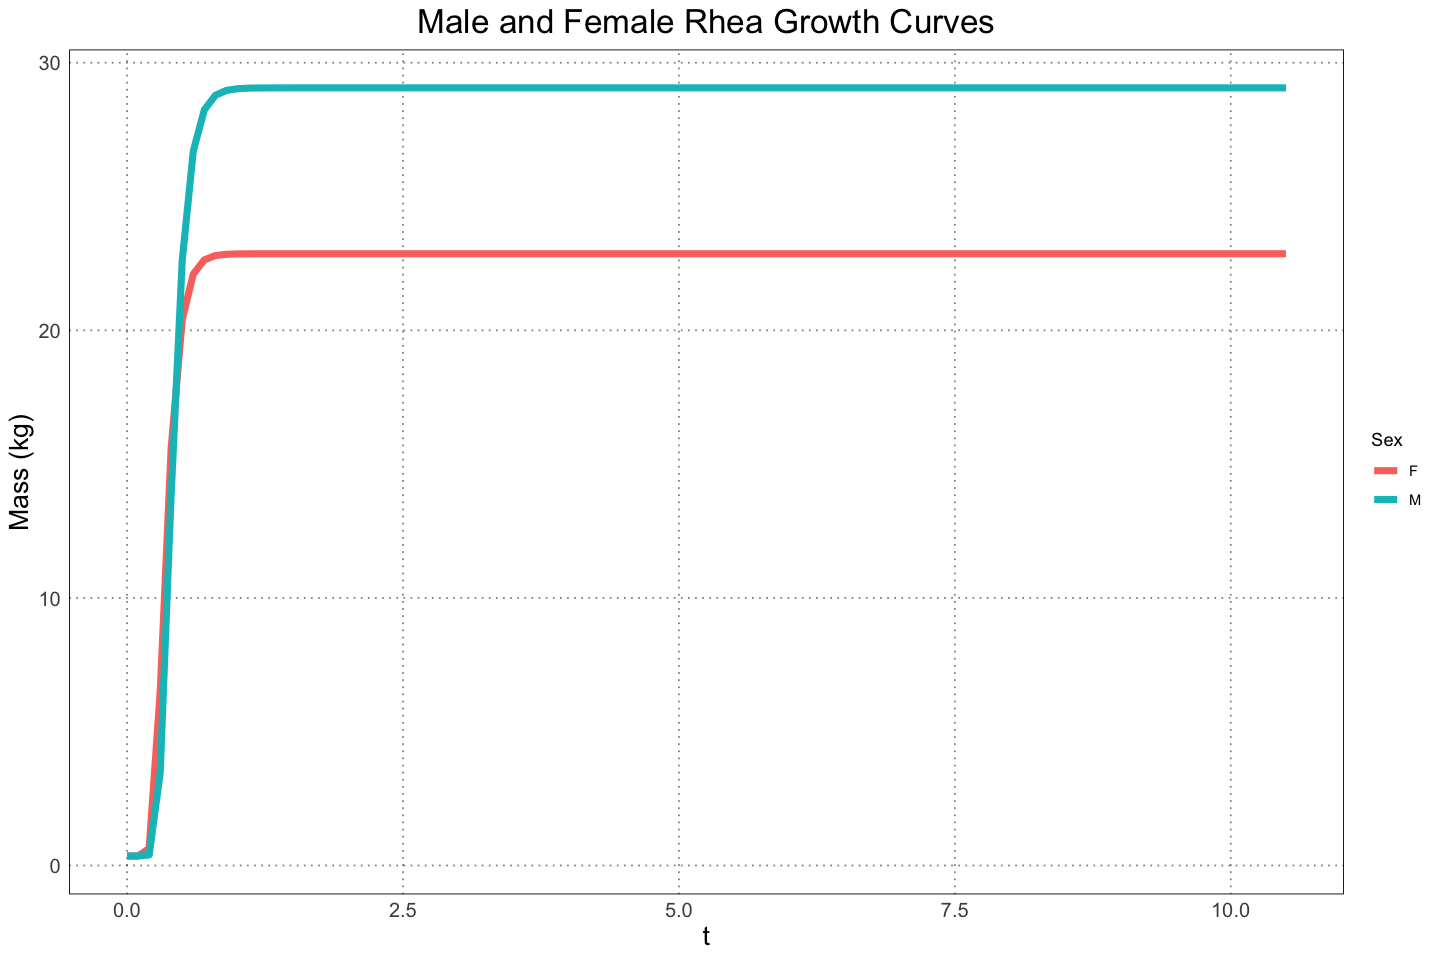

In [5]:
ggplot(plot_df, aes(t, mass, group = sex, colour = sex)) +
    geom_line(linewidth=2) +
    custom_theme() +
    labs(x="t", y="Mass (kg)", title="Male and Female Rhea Growth Curves", colour="Sex")

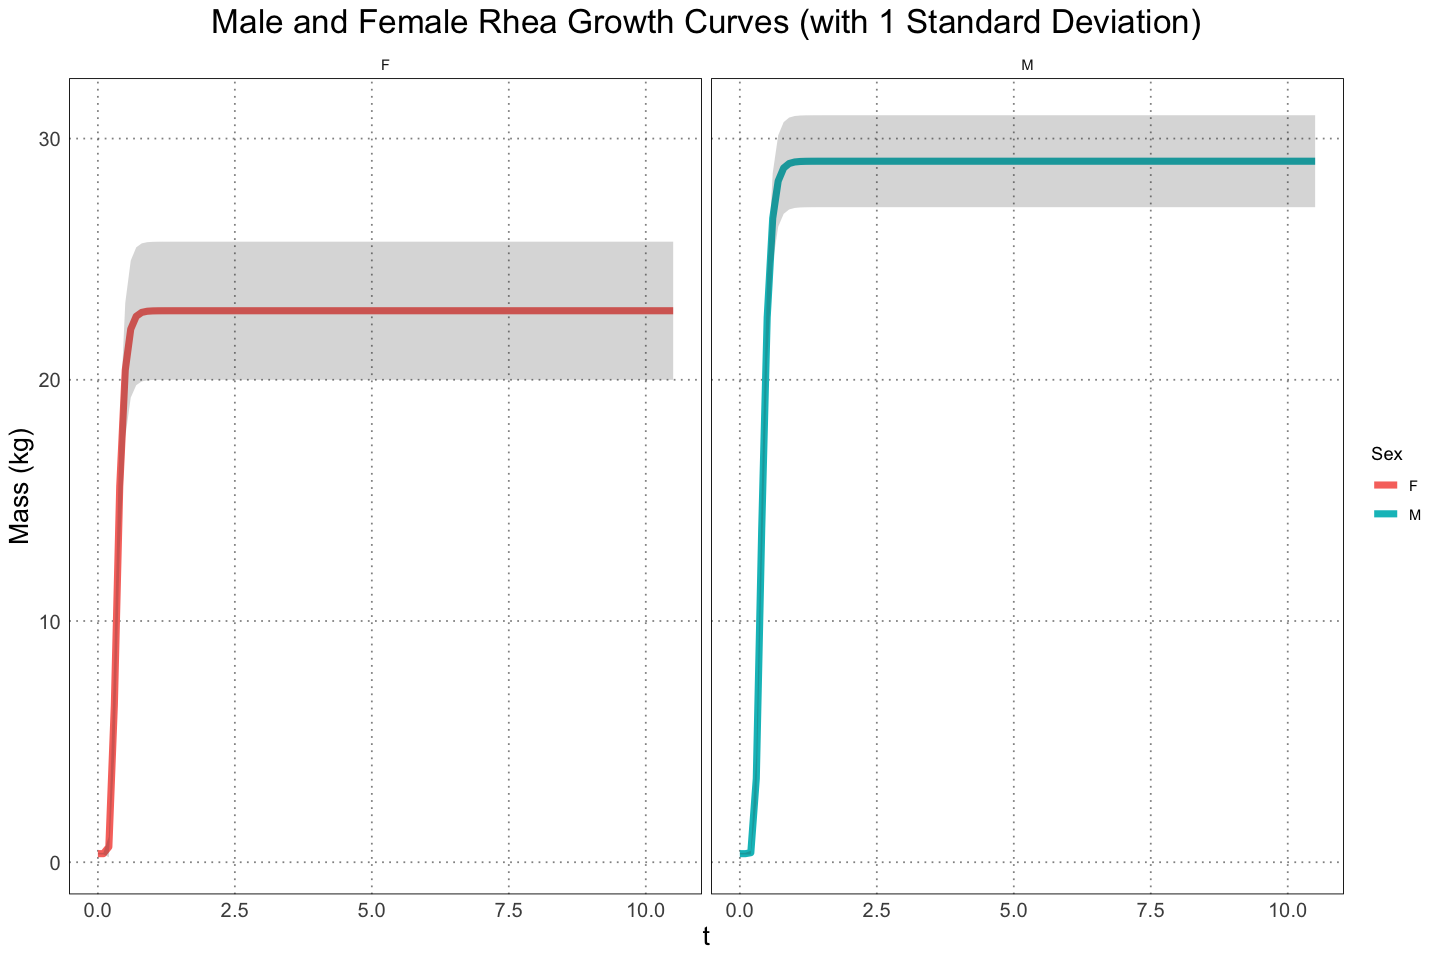

In [6]:
ggplot(plot_df, aes(t, mass, group = sex, colour = sex)) +
    geom_line(linewidth=2) +
    custom_theme() +
    labs(x="t", y="Mass (kg)", title="Male and Female Rhea Growth Curves (with 1 Standard Deviation)", colour="Sex") +
    geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.2, colour = NA) +
    facet_wrap(vars(sex))

For the alligators, Wilkinson & Rhodes (1997) found that their lengths followed a [von Bertalanffy curve](https://en.wikipedia.org/wiki/Von_Bertalanffy_function),

$$
f(t) = a (1-e^{-k (t - t_0)})
$$

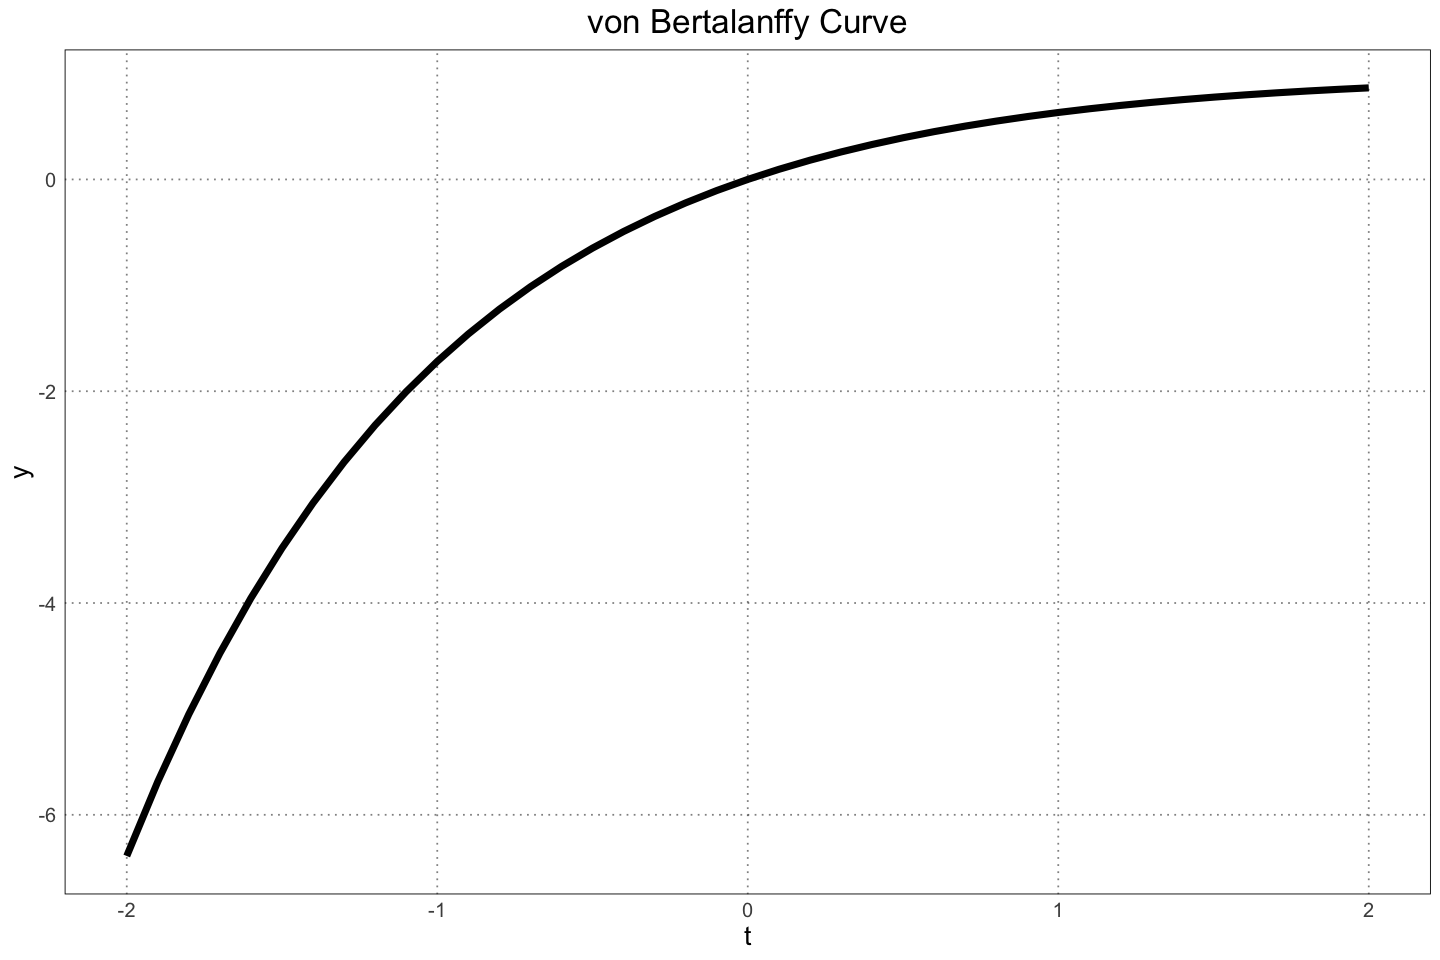

In [7]:
t <- seq(-2, 2, by=0.1)
y <- 1 - exp(-t)
plot_df <- data.frame(t=t, y=y)

ggplot(plot_df, aes(t, y)) +
    geom_line(linewidth=2) +
    custom_theme() +
    labs(title="von Bertalanffy Curve")

For the alligators, the authors used the following information. Note that here we are measuring the length rather than the mass.

$$
\begin{align*}
L_m &= 3.79 * (1 - 0.94 e^{-0.0695t}) \\
\sigma_{L_m} &= 0.0589 \log L_m + 0.0816 \\
L_f &= 2.78 * (1 - 0.91 e^{-0.0926t}) \\
\sigma_{L_f} &= 0.0332 \log L_f + 0.046 \\
\end{align*}
$$

In [8]:

ALLIGATOR_MAX_LIFESPAN <- 50
alligator_male_length <- function(t) {
    3.79 * (1 - 0.94 * exp(-0.0695 * t))
}
alligator_male_sigma <- function(L_m) {
    # have to do this because sometimes the sigma becomes 0 or negative
    max(0.0589 * log(L_m) + 0.0816, 0.00001)
}
alligator_female_length <- function(t) {
    2.78 * (1 - 0.91 * exp(-0.0926 * t))
}
alligator_female_sigma <- function(L_f) {
    0.0332 * log(L_f) + 0.046
}
t <- seq(0, ALLIGATOR_MAX_LIFESPAN, by=0.1)
L_m <- alligator_male_length(t)
L_f <- alligator_female_length(t)

plot_df <- data.frame(
    t = rep(t, 2),
    length = c(L_m, L_f),
    sex = rep(c("M", "F"), each=length(t)),
    lower = c(L_m - alligator_male_sigma(L_m), L_f - alligator_female_sigma(L_f)),
    upper = c(L_m + alligator_male_sigma(L_m), L_f + alligator_female_sigma(L_f))
    )

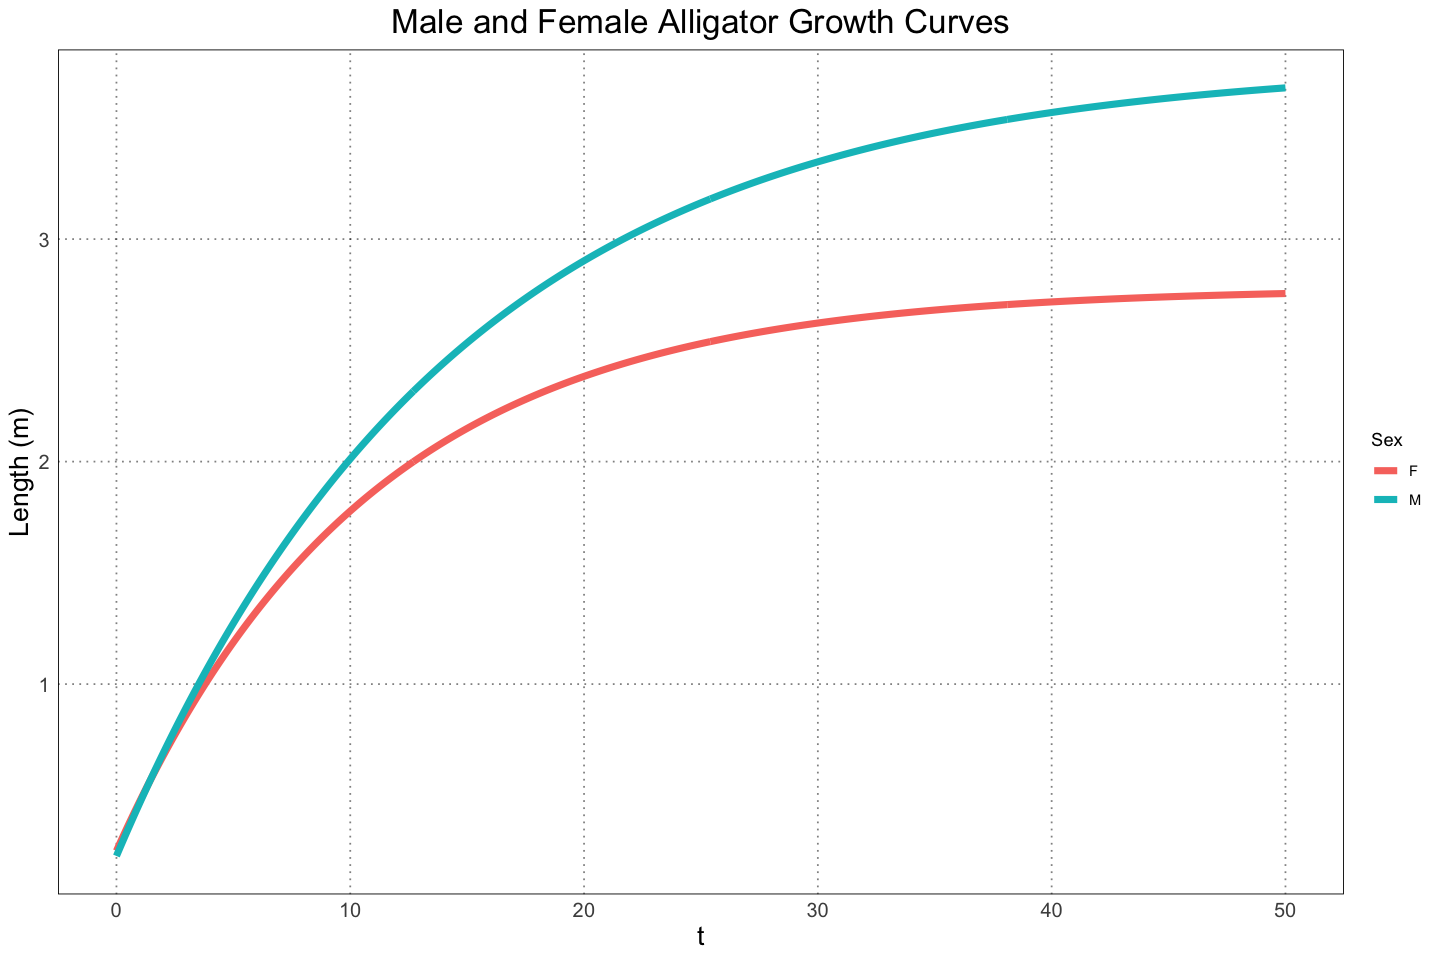

In [9]:
ggplot(plot_df, aes(t, length, group = sex, colour = sex)) +
    geom_line(linewidth=2) +
    custom_theme() +
    labs(x="t", y="Length (m)", title="Male and Female Alligator Growth Curves", colour="Sex")

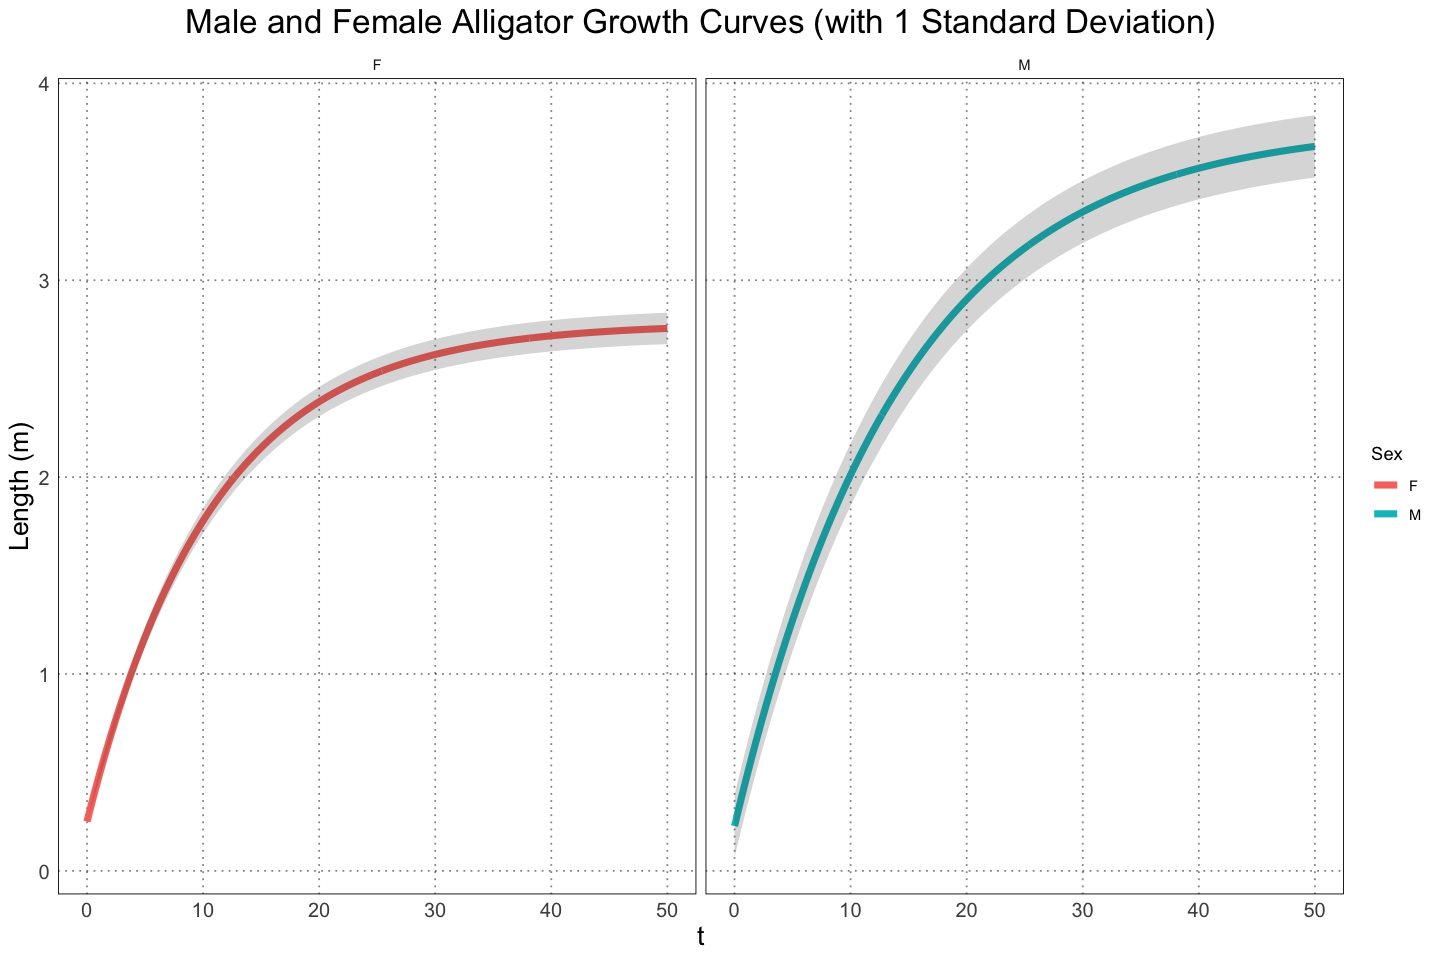

In [10]:
ggplot(plot_df, aes(t, length, group = sex, colour = sex)) +
    geom_line(linewidth=2) +
    custom_theme() +
    labs(x="t", y="Length (m)", title="Male and Female Alligator Growth Curves (with 1 Standard Deviation)", colour="Sex") +
    geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.2, colour = NA) +
    facet_wrap(vars(sex))

# $t$-Tests - Entire Population

For the next step, the authors looked at how likely it was to recover the known sexual dimorphism from the two populations. The way that they initially did this was to generate a sample of 1000 simulated individuals for each sex and then take subsets of the appropriate size from each group, then using a $t$ test to test the significance of the difference between them. They chose $\alpha=0.05$ and sample sizes of $n=100$, $n=75$, $n=50$, $n=25$, $n=20$, $n=15$, $n=10$, and $n=5$.

In [11]:
set.seed(1000)
# generate the samples for the rhea and alligator populations
NUM_SAMPLES <- 1e4

# rheas first
ages_rhea <- runif(NUM_SAMPLES, 0, RHEA_MAX_LIFESPAN)

rhea_male_sizes <- rhea_male_size(ages_rhea)
rhea_male_sizes_with_noise <- rnorm(NUM_SAMPLES, mean=rhea_male_sizes, sd = rhea_male_sigma(rhea_male_sizes))

rhea_female_sizes <- rhea_female_size(ages_rhea)
rhea_female_sizes_with_noise <- rnorm(NUM_SAMPLES, mean = rhea_female_sizes, sd = rhea_female_sigma(rhea_female_sizes))

# now the alligators

ages_alligator <- runif(NUM_SAMPLES, 0, ALLIGATOR_MAX_LIFESPAN)
alligator_male_sizes <- alligator_male_length(ages_alligator)
alligator_male_sizes_with_noise <- rnorm(NUM_SAMPLES, mean = alligator_male_sizes, sd = alligator_male_sigma(alligator_male_sizes))

alligator_female_sizes <- alligator_female_length(ages_alligator)
alligator_female_sizes_with_noise <- rnorm(NUM_SAMPLES, mean = alligator_female_sizes, sd = alligator_female_sigma(alligator_female_sizes))

In [12]:
ns <- c(5, 10, 15, 20, 25, 50, 75, 100)
NUM_TESTS <- 1e3
alpha <- 0.05

# now go through and take subsamples of the values that we have, testing for the significance level and statistic
sample_test_results <- data.frame(T = numeric(), p = numeric(), n = integer(), type = character())
for (n in ns) {
    interim_results_rhea <- data.frame(T = numeric(NUM_TESTS), p = numeric(NUM_TESTS), n = integer(NUM_TESTS), type = character(NUM_TESTS))
    interim_results_alligator <- data.frame(T = numeric(NUM_TESTS), p = numeric(NUM_TESTS), n = integer(NUM_TESTS), type = character(NUM_TESTS))
    # rhea first
    for (i in 1:NUM_TESTS) {
        male_samples <- sample(rhea_male_sizes_with_noise, size = n, replace = FALSE)
        female_samples <- sample(rhea_female_sizes_with_noise, size = n, replace = FALSE)
        test <- t.test(male_samples, female_samples, conf.level = alpha)
        interim_results_rhea[i, "T"] <- test$statistic
        interim_results_rhea[i, "p"] <- test$p.value
        interim_results_rhea[i, "n"] <- n
        interim_results_rhea[i, "type"] <- "Rhea"
    }

    # now the alligators
    for (i in 1:NUM_TESTS) {
        male_samples <- sample(alligator_male_sizes_with_noise, size = n, replace = FALSE)
        female_samples <- sample(alligator_female_sizes_with_noise, size = n, replace = FALSE)
        test <- t.test(male_samples, female_samples, conf.level = alpha)
        interim_results_alligator[i, "T"] <- test$statistic
        interim_results_alligator[i, "p"] <- test$p.value
        interim_results_alligator[i, "n"] <- n
        interim_results_alligator[i, "type"] <- "Alligator"
    }
    
    # this is not the cleanest way to accomplish this, but I think it's more readable than some of the other methods that I tested
    sample_test_results <- rbind(sample_test_results, interim_results_rhea, interim_results_alligator)
}
sample_test_results$type = factor(sample_test_results$type)
summary(sample_test_results)
head(sample_test_results)

       T                p                   n                 type     
 Min.   :-2.505   Min.   :0.0000000   Min.   :  5.00   Alligator:8000  
 1st Qu.: 2.135   1st Qu.:0.0000009   1st Qu.: 13.75   Rhea     :8000  
 Median : 3.735   Median :0.0009869   Median : 22.50                   
 Mean   : 4.098   Mean   :0.0856287   Mean   : 37.50                   
 3rd Qu.: 5.684   3rd Qu.:0.0487768   3rd Qu.: 56.25                   
 Max.   :16.833   Max.   :0.9988721   Max.   :100.00                   

T          p            n type
1  6.2673078 0.0005655399 5 Rhea
2  0.7076400 0.5099547253 5 Rhea
3  4.3756183 0.0023639461 5 Rhea
4 -0.1294057 0.9024189498 5 Rhea
5  5.2953315 0.0009642248 5 Rhea
6  2.7466514 0.0410713416 5 Rhea

In [13]:
plot_df <- data.frame(n = integer(), mean_p = numeric(), lower = numeric(), upper = numeric())
for (type in levels(sample_test_results$type)) {
    for (n in ns) {
        relevant <- sample_test_results[sample_test_results$n == n & sample_test_results$type == type, ]
        sd_p <- sd(relevant$p)
        mean_p <- mean(relevant$p)
        lower <- quantile(relevant$p, 0.25)
        upper <- quantile(relevant$p, 0.75)
        plot_df <- rbind(plot_df, data.frame(n = n, mean_p = mean_p, lower = lower, upper = upper, type = type))
    }
}
plot_df$type <- factor(plot_df$type)
head(plot_df)
summary(plot_df)

n  mean_p     lower        upper       type     
25%   5 0.35532951 6.494340e-02 0.622750393 Alligator
25%1 10 0.23612360 2.621041e-02 0.374274598 Alligator
25%2 15 0.17247759 9.892447e-03 0.244953847 Alligator
25%3 20 0.12802210 3.707247e-03 0.146897304 Alligator
25%4 25 0.09067356 2.441250e-03 0.091274078 Alligator
25%5 50 0.01533991 4.013513e-05 0.007421802 Alligator

       n              mean_p              lower               upper          
 Min.   :  5.00   Min.   :0.0000054   Min.   :0.000e+00   Min.   :0.0000000  
 1st Qu.: 13.75   1st Qu.:0.0024559   1st Qu.:2.900e-07   1st Qu.:0.0003026  
 Median : 22.50   Median :0.0417664   Median :2.437e-05   Median :0.0281715  
 Mean   : 37.50   Mean   :0.0856287   Mean   :6.933e-03   Mean   :0.1126462  
 3rd Qu.: 56.25   3rd Qu.:0.1381956   3rd Qu.:3.629e-03   3rd Qu.:0.1352065  
 Max.   :100.00   Max.   :0.3553295   Max.   :6.494e-02   Max.   :0.6227504  
        type  
 Alligator:8  
 Rhea     :8  
              
              
              
              

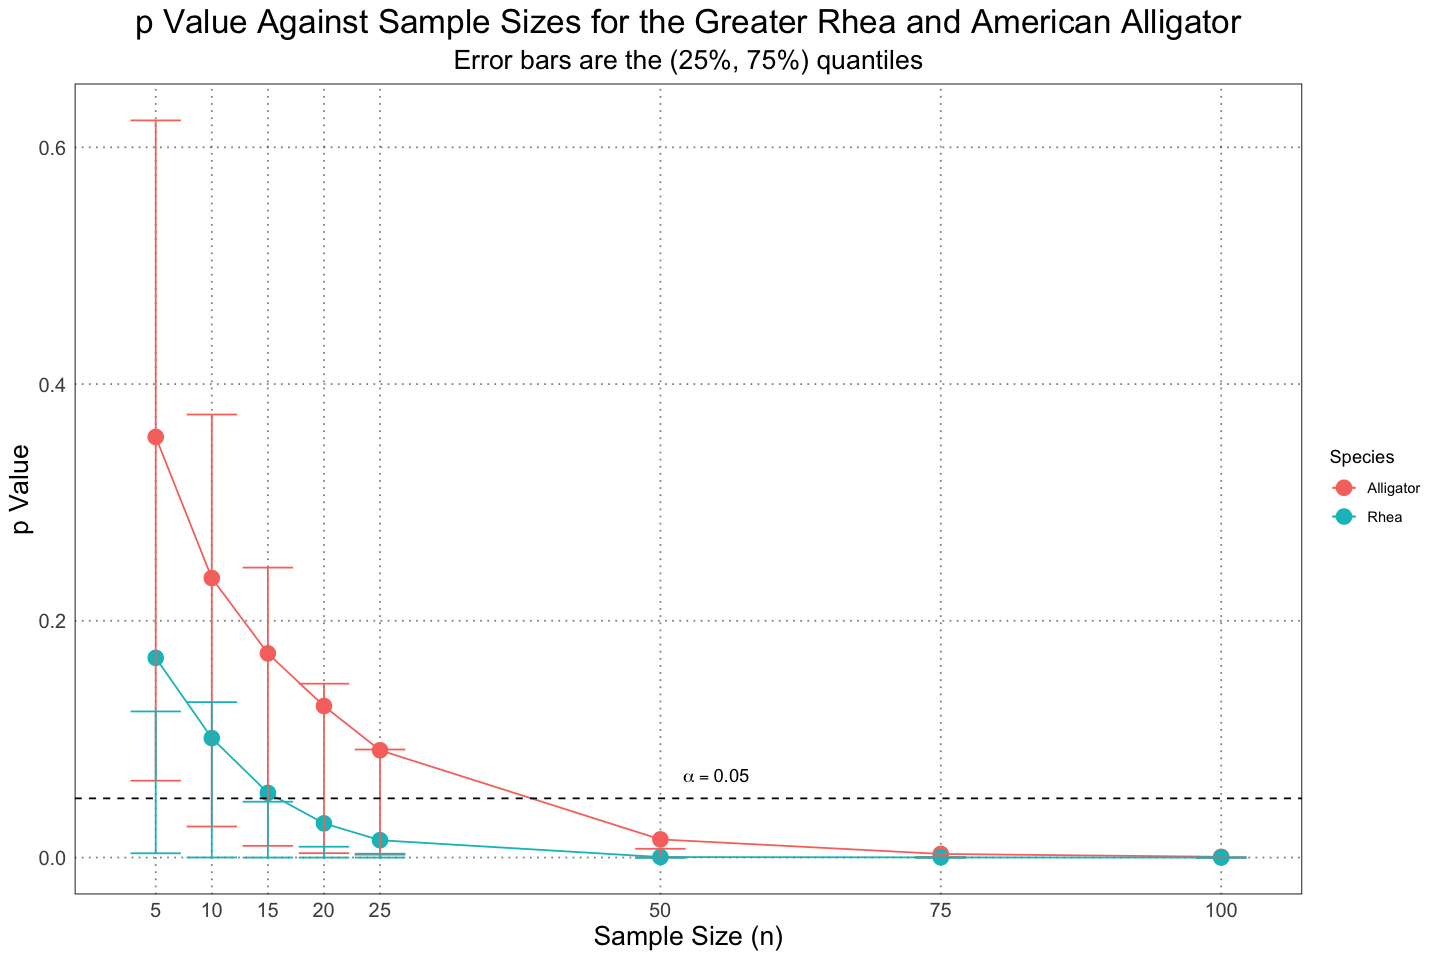

In [14]:
ggplot(plot_df, aes(n, mean_p, group = type, colour = type)) +
    geom_point(size = 4) +
    geom_line() +
    geom_errorbar(aes(ymin=lower, ymax=upper, colour = type)) +
    geom_hline(aes(yintercept=0.05), linetype = 'dashed') +
    annotate('text',x=55, y=alpha + 0.02, label="alpha == 0.05", parse = TRUE) +
    scale_x_continuous(
        breaks = ns
    ) +
    labs(
        x = "Sample Size (n)",
        y = "p Value",
        title = "p Value Against Sample Sizes for the Greater Rhea and American Alligator",
        colour = "Species",
        subtitle = "Error bars are the (25%, 75%) quantiles"
    ) +
    custom_theme()

The results are largely the same as in the actual paper, although the error bars seem quite a bit larger in my code than in the paper itself. I'm not sure what is going on here, but I suspect that my definition of the extent of the error bars are different from what they are using in figure 4. I have tried in a few different ways to recreate the error bars (using $\pm$ 1 standard deviation instead and playing around with the quantiles), but haven't been able to exactly recreate the values I see published. Unfortunately they do not include the actual code they used to generate the samples in their additional data, so I can't peek in and see what they did. Nonetheless, the fact that I generated my samples in roughly that same way and have the same means leads me to believe that the only difference is in how I'm defining the error bars, not some fundamental flaw in how the code is run.

Otherwise, this is roughly what we see in the paper - the fact that the alligators spend much of their life growing (in contrast to the rheas, which reach their adult size quickly and then spend most of their life there) makes it more difficult to detect the sexual size dimorphism, even though the actual effect is larger in the alligators than the rheas.

## Alligators - Accounting for Population Structure

The next thing that the authors did was to try to account for the population structure of the alligators. For alligator populations there are typically many more juveniles around at any one time than adults - what effect will this have on the ability to detect sexual dimorphism?

The authors used data from Nichols, et. al. (1976) to calculate the percent composition of the population by age and found it to match a normal distribution.

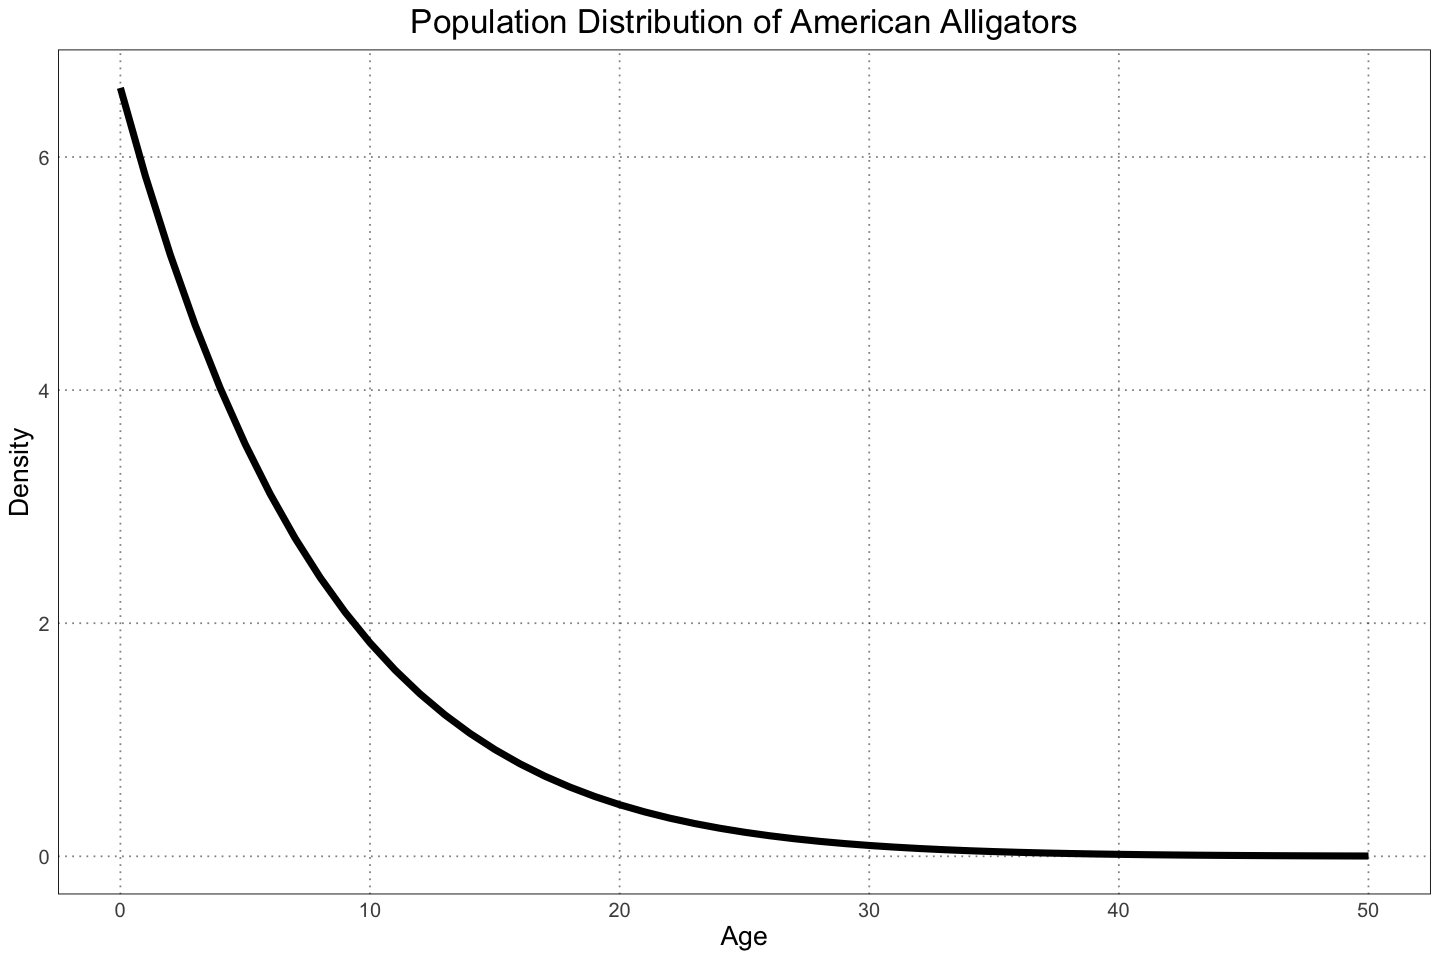

In [15]:
ages <- seq(0, ALLIGATOR_MAX_LIFESPAN, by=1)
probabilities <- 1295.2 * exp(-(ages + 87.185) ^ 2 / (2 * 719.76))
ggplot(data.frame(x = ages, y = probabilities), aes(x, y)) +
    geom_line(linewidth = 2) +
    custom_theme() +
    labs(x = "Age", y = "Density", title = "Population Distribution of American Alligators")

So what happens when we try to sample from the population, accounting for the preponderence of juveniles? Naively, we would expect our ability to detect a difference to decrease, since we are sampling more from the juvenile, less sexually dimorphic individuals. Let's see what happens!

In [16]:
population_density <- 1295.2 * exp(-(ages_alligator + 87.185) ^ 2 / (2 * 719.76))

# try to run the same comparisons but with the new population structure
ages_with_population_structure <- sample(ages_alligator, NUM_SAMPLES, replace = TRUE, prob = population_density)
alligator_male_sizes_population_structure <- alligator_male_length(ages_with_population_structure)
alligator_male_sizes_with_noise_population_structure <- rnorm(NUM_SAMPLES, mean = alligator_male_sizes_population_structure, sd = alligator_male_sigma(alligator_male_sizes_population_structure))

alligator_female_sizes_population_structure <- alligator_female_length(ages_with_population_structure)
alligator_female_sizes_with_noise_population_structure <- rnorm(NUM_SAMPLES, mean = alligator_female_sizes_population_structure, sd = alligator_female_sigma(alligator_female_sizes_population_structure))

In [17]:
population_structure_test_results <- data.frame(T = numeric(), p = numeric(), n = integer())
for (n in ns) {
    interim_test_results <- data.frame(T = numeric(NUM_TESTS), p = numeric(NUM_TESTS), n = integer(NUM_TESTS))
    for (i in 1:NUM_TESTS) {
        male_samples <- sample(alligator_male_sizes_with_noise_population_structure, size = n, replace = FALSE)
        female_samples <- sample(alligator_female_sizes_with_noise_population_structure, size = n, replace = FALSE)
        test <- t.test(male_samples, female_samples, conf.level = alpha)
        interim_test_results[i, "T"] <- test$statistic
        interim_test_results[i, "p"] <- test$p.value
        interim_test_results[i, "n"] <- n
    }
    population_structure_test_results <- rbind(population_structure_test_results, interim_test_results)
}
summary(population_structure_test_results)

       T                  p                   n         
 Min.   :-4.06790   Min.   :0.0000018   Min.   :  5.00  
 1st Qu.: 0.08061   1st Qu.:0.1284056   1st Qu.: 13.75  
 Median : 0.78057   Median :0.3525427   Median : 22.50  
 Mean   : 0.78358   Mean   :0.4066990   Mean   : 37.50  
 3rd Qu.: 1.49920   3rd Qu.:0.6606015   3rd Qu.: 56.25  
 Max.   : 5.35829   Max.   :0.9997194   Max.   :100.00  

In [18]:

population_structure_plot_df <- data.frame(n = integer(), mean_p = numeric(), lower = numeric(), upper = numeric(), population_structure=logical())
for (n in ns) {
    relevant <- population_structure_test_results[population_structure_test_results$n == n, ]
    sd_p <- sd(relevant$p)
    mean_p <- mean(relevant$p)
    lower <- quantile(relevant$p, 0.25)
    upper <- quantile(relevant$p, 0.75)
    population_structure_plot_df <- rbind(population_structure_plot_df, data.frame(n = n, mean_p = mean_p, lower = lower, upper = upper))
}
population_structure_plot_df$population_structure <- TRUE

alligator_data <- plot_df[plot_df$type == "Alligator", ]
combined_population_structure_plot_df <- rbind(population_structure_plot_df, data.frame(
    n=alligator_data$n,
    mean_p=alligator_data$mean_p,
    lower=alligator_data$lower,
    upper=alligator_data$upper,
    population_structure=FALSE
))
head(combined_population_structure_plot_df)
summary(combined_population_structure_plot_df)

n  mean_p    lower     upper     population_structure
25%   5 0.4972092 0.2525385 0.7544635 TRUE                
25%1 10 0.4754072 0.2121072 0.7329290 TRUE                
25%2 15 0.4612743 0.2009880 0.7156935 TRUE                
25%3 20 0.4409914 0.1730143 0.6902977 TRUE                
25%4 25 0.4351268 0.1546312 0.6910832 TRUE                
25%5 50 0.3629550 0.1002336 0.6021423 TRUE

       n              mean_p             lower               upper          
 Min.   :  5.00   Min.   :0.000626   Min.   :5.000e-08   Min.   :0.0000466  
 1st Qu.: 13.75   1st Qu.:0.118685   1st Qu.:3.391e-03   1st Qu.:0.1329915  
 Median : 22.50   Median :0.290314   Median :5.083e-02   Median :0.4775037  
 Mean   : 37.50   Mean   :0.265953   Mean   :8.140e-02   Mean   :0.4143514  
 3rd Qu.: 56.25   3rd Qu.:0.436593   3rd Qu.:1.592e-01   3rd Qu.:0.6904941  
 Max.   :100.00   Max.   :0.497209   Max.   :2.525e-01   Max.   :0.7544635  
 population_structure
 Mode :logical       
 FALSE:8             
 TRUE :8             
                     
                     
                     

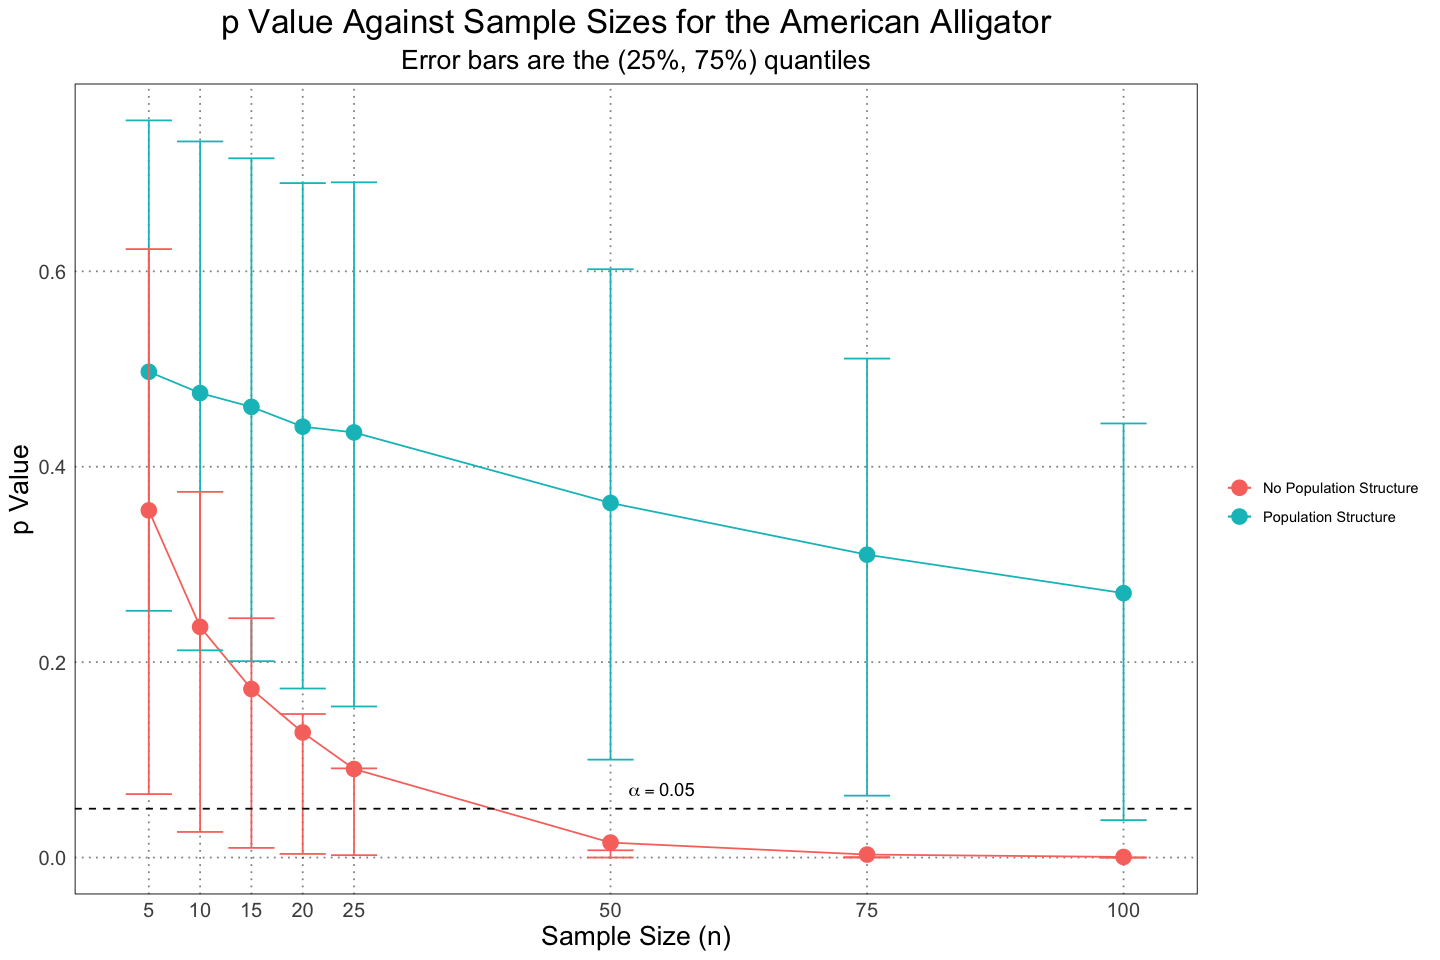

In [19]:
ggplot(combined_population_structure_plot_df, aes(n, mean_p, group = population_structure, colour = population_structure)) +
    geom_point(size = 4) +
    geom_line() +
    geom_errorbar(aes(ymin=lower, ymax=upper, colour = population_structure)) +
    geom_hline(aes(yintercept=0.05), linetype = 'dashed') +
    annotate('text',x=55, y=alpha + 0.02, label="alpha == 0.05", parse = TRUE) +
    scale_x_continuous(
        breaks = ns
    ) +
    labs(
        x = "Sample Size (n)",
        y = "p Value",
        title = "p Value Against Sample Sizes for the American Alligator",
        colour = "",
        subtitle = "Error bars are the (25%, 75%) quantiles"
    ) +
    scale_colour_discrete(
        labels = c("No Population Structure", "Population Structure")
    ) +
    custom_theme()

And as expected, when we add in the juveniles it becomes very, very difficult to pick out the sexual dimorphism that we know is there.

## Alligators - Accounting for Taphonomic Bias

The final approach that the authors took was to try to account for the biases introduced by the process of fossilization. Essentially, smaller animals are less likely to fossilize - they can be eaten whole, their bones are more fragile, and even when they do fossilize the fossils are harder to notice, among a host of other reasons.

For this analysis, the authors use the results from Brown et. al. (2013), which examined taphonomic bias in the Dinosaur Park Formation. They found that there was a definite bias against smaller animals with a cutoff point of about 60kg, with larger animals much more likely to be completely or mostly preserved and those less than that being far less likely.

We would expect this effect to help with our ability to detect dimorphism, since the taphonomic processes are now removing the young individuals and preferentiallly preserving the larger, more mature (and slower-growing) individuals. We can simulate the effect by only sampling from the larger individuals (but still including the effect of the population structure) - let's see what happens!

In [20]:
# remember that the alligator sizes are for the length, not the mass
# 60kg cutoff -> ~2.45m cutoff for length
ALLIGATOR_LENGTH_CUTOFF <- 2.45

# easy - just take the subset of our existing sample with this size or greater
alligator_male_sizes_taphonomic_bias <- alligator_male_sizes_with_noise_population_structure[alligator_male_sizes_population_structure > ALLIGATOR_LENGTH_CUTOFF]
alligator_female_sizes_taphonomic_bias <- alligator_female_sizes_with_noise_population_structure[alligator_female_sizes_population_structure > ALLIGATOR_LENGTH_CUTOFF]

In [21]:
taphonomic_bias_test_results <- data.frame(T = numeric(), p = numeric(), n = integer())
for (n in ns) {
    interim_test_results <- data.frame(T = numeric(NUM_TESTS), p = numeric(NUM_TESTS), n = integer(NUM_TESTS))
    for (i in 1:NUM_TESTS) {
        male_samples <- sample(alligator_male_sizes_taphonomic_bias, size = n, replace = FALSE)
        female_samples <- sample(alligator_female_sizes_taphonomic_bias, size = n, replace = FALSE)
        test <- t.test(male_samples, female_samples, conf.level = alpha)
        interim_test_results[i, "T"] <- test$statistic
        interim_test_results[i, "p"] <- test$p.value
        interim_test_results[i, "n"] <- n
    }
    taphonomic_bias_test_results <- rbind(taphonomic_bias_test_results, interim_test_results)
}
summary(taphonomic_bias_test_results)

       T                p                   n         
 Min.   :-1.870   Min.   :0.0000000   Min.   :  5.00  
 1st Qu.: 2.850   1st Qu.:0.0000000   1st Qu.: 13.75  
 Median : 4.190   Median :0.0004075   Median : 22.50  
 Mean   : 4.616   Mean   :0.0390953   Mean   : 37.50  
 3rd Qu.: 6.481   3rd Qu.:0.0147852   3rd Qu.: 56.25  
 Max.   :12.177   Max.   :0.9933451   Max.   :100.00  

In [22]:
taphonomic_bias_plot_df <- data.frame(n = integer(), mean_p = numeric(), lower = numeric(), upper = numeric())
for (n in ns) {
    relevant <- taphonomic_bias_test_results[taphonomic_bias_test_results$n == n, ]
    sd_p <- sd(relevant$p)
    mean_p <- mean(relevant$p)
    lower <- quantile(relevant$p, 0.25)
    upper <- quantile(relevant$p, 0.75)
    taphonomic_bias_plot_df <- rbind(taphonomic_bias_plot_df, data.frame(n = n, mean_p = mean_p, lower = lower, upper = upper))
}
taphonomic_bias_plot_df$taphonomic_bias <- TRUE

alligator_data <- plot_df[plot_df$type == "Alligator", ]
combined_taphonomic_plot_df <- rbind(taphonomic_bias_plot_df, data.frame(
    n=alligator_data$n,
    mean_p=alligator_data$mean_p,
    lower=alligator_data$lower,
    upper=alligator_data$upper,
    taphonomic_bias=FALSE
))
head(combined_taphonomic_plot_df)
summary(combined_taphonomic_plot_df)

n  mean_p       lower        upper        taphonomic_bias
25%   5 2.079930e-01 4.309880e-02 2.968623e-01 TRUE           
25%1 10 6.879565e-02 6.372766e-03 7.765157e-02 TRUE           
25%2 15 2.342919e-02 1.239464e-03 1.966443e-02 TRUE           
25%3 20 8.556291e-03 2.445860e-04 5.886545e-03 TRUE           
25%4 25 3.958516e-03 5.021056e-05 1.984934e-03 TRUE           
25%5 50 2.968231e-05 1.750203e-08 3.125642e-06 TRUE

       n              mean_p             lower               upper          
 Min.   :  5.00   Min.   :0.000000   Min.   :0.000e+00   Min.   :0.0000000  
 1st Qu.: 13.75   1st Qu.:0.002456   1st Qu.:9.200e-07   1st Qu.:0.0003026  
 Median : 22.50   Median :0.019384   Median :7.420e-04   Median :0.0135431  
 Mean   : 37.50   Mean   :0.082151   Mean   :9.890e-03   Mean   :0.1181287  
 3rd Qu.: 56.25   3rd Qu.:0.139136   3rd Qu.:7.253e-03   3rd Qu.:0.1714114  
 Max.   :100.00   Max.   :0.355330   Max.   :6.494e-02   Max.   :0.6227504  
 taphonomic_bias
 Mode :logical  
 FALSE:8        
 TRUE :8        
                
                
                

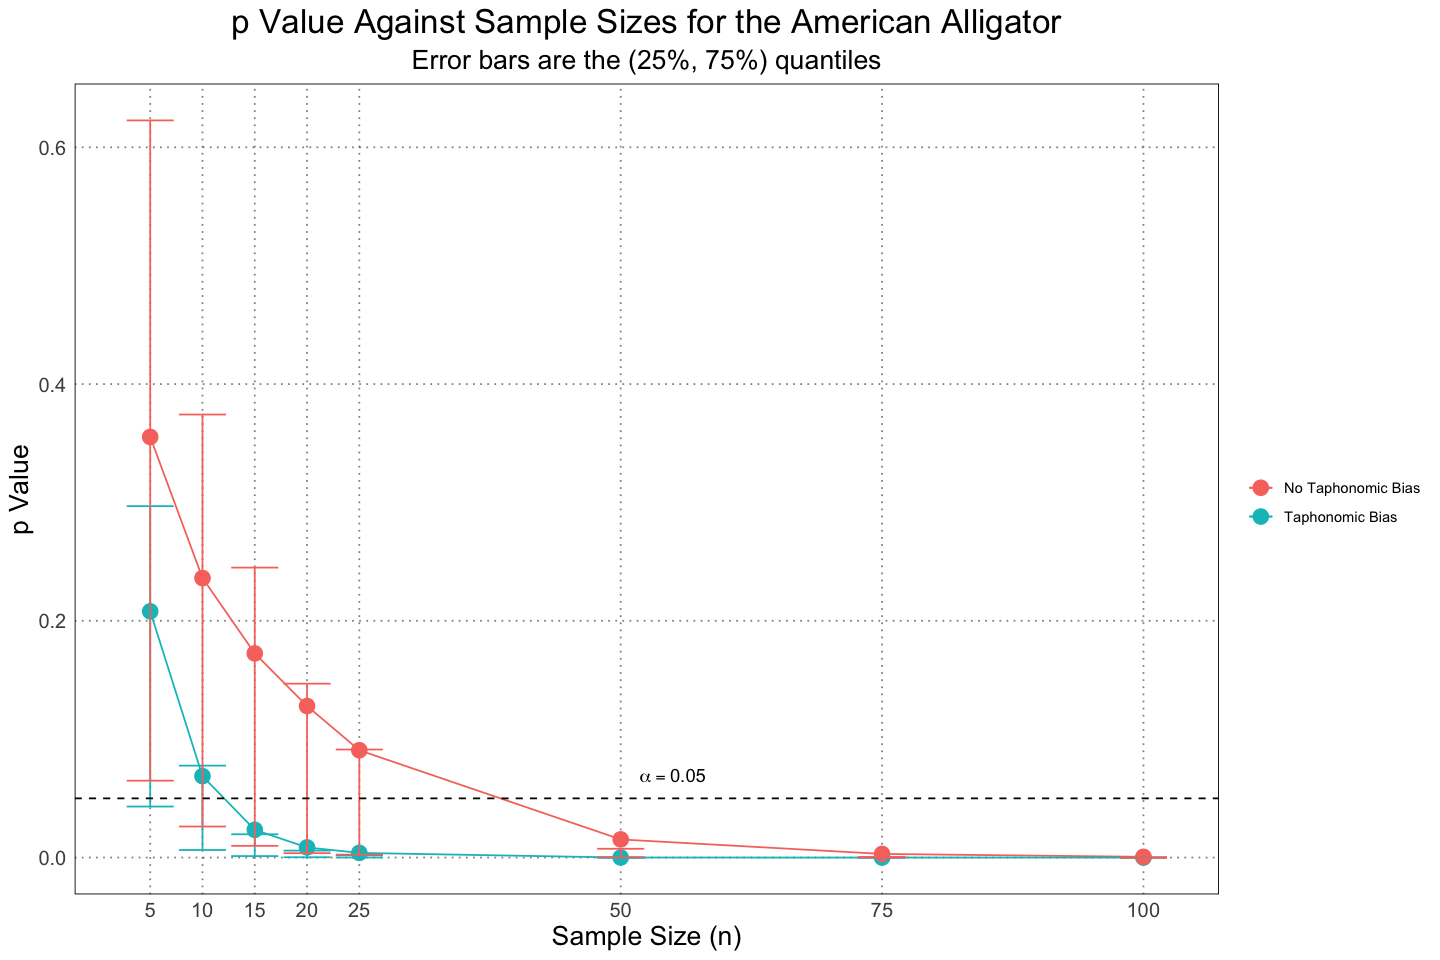

In [23]:
ggplot(combined_taphonomic_plot_df, aes(n, mean_p, group = taphonomic_bias, colour = taphonomic_bias)) +
    geom_point(size = 4) +
    geom_line() +
    geom_errorbar(aes(ymin=lower, ymax=upper, colour = taphonomic_bias)) +
    geom_hline(aes(yintercept=0.05), linetype = 'dashed') +
    annotate('text',x=55, y=alpha + 0.02, label="alpha == 0.05", parse = TRUE) +
    scale_x_continuous(
        breaks = ns
    ) +
    labs(
        x = "Sample Size (n)",
        y = "p Value",
        title = "p Value Against Sample Sizes for the American Alligator",
        colour = "",
        subtitle = "Error bars are the (25%, 75%) quantiles"
    ) +
    scale_colour_discrete(
        labels = c("No Taphonomic Bias", "Taphonomic Bias")
    ) +
    custom_theme()

So as expected, we see that including the taphonomic bias makes it more likely for us to detect the sexual dimorphism.

Note that these results are actually stronger than those presented in the paper, despite using the same method. It is unclear to me why that is.

There is another subtletly here that we can account for. In the paper, the author filtered on the *mean* length being above 2.45m, but allowed the actual lengths to vary around this. That means that actual lengths could fall below the preservation threshold. If we instead require that the actual lengths of the alligators not fall below the cutoff, the results are somewhat stronger.

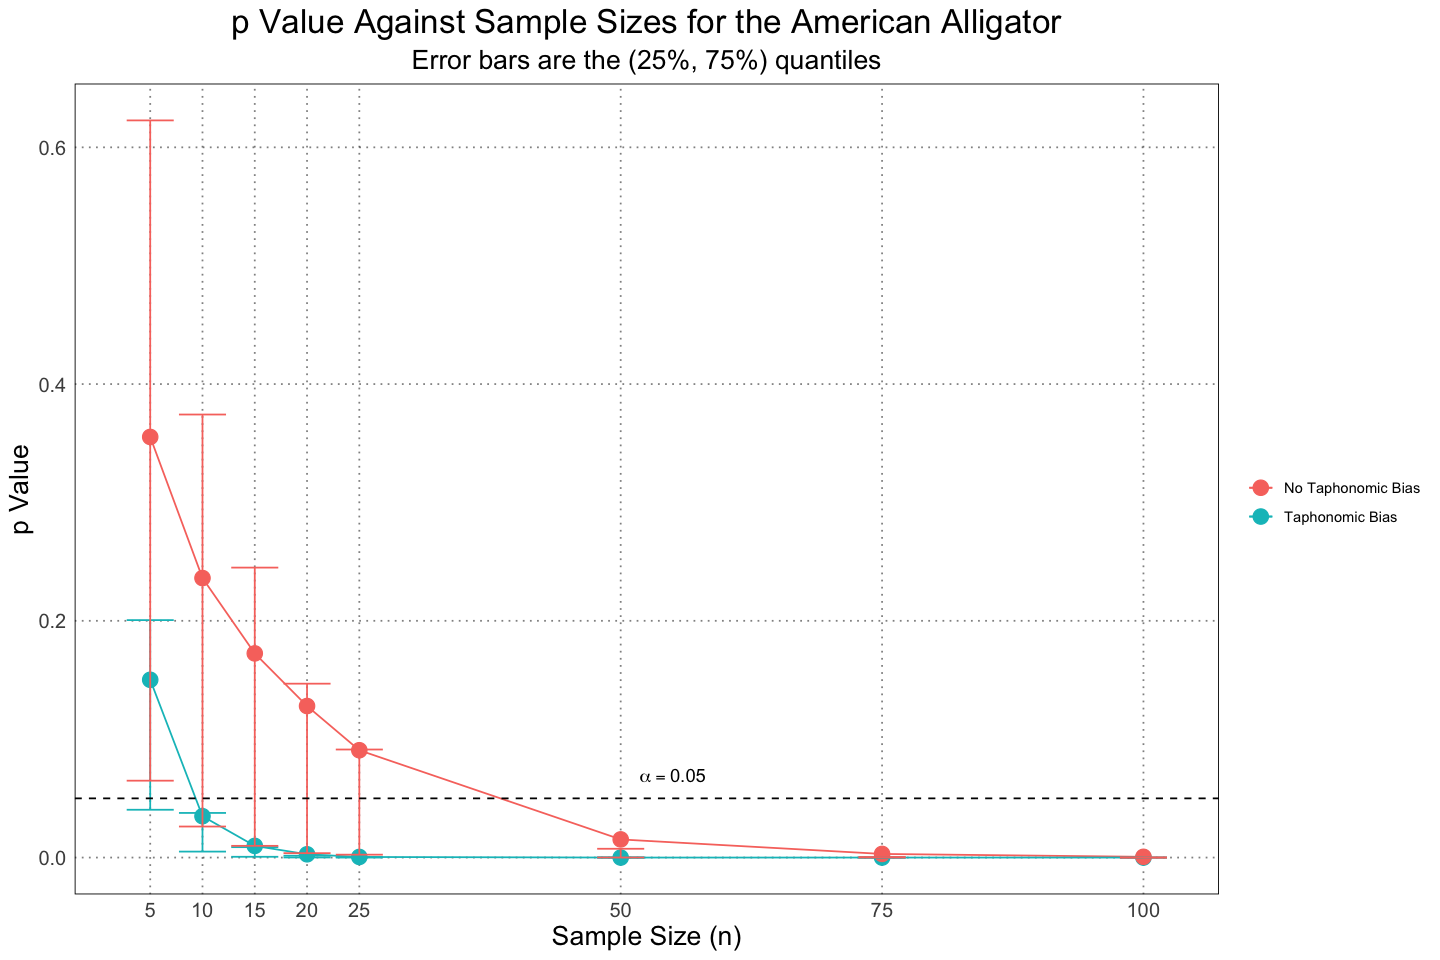

In [26]:
alligator_male_sizes_taphonomic_bias <- subset(alligator_male_sizes_with_noise_population_structure, alligator_male_sizes_with_noise_population_structure > ALLIGATOR_LENGTH_CUTOFF)
alligator_female_sizes_taphonomic_bias <- subset(alligator_female_sizes_with_noise_population_structure, alligator_female_sizes_with_noise_population_structure > ALLIGATOR_LENGTH_CUTOFF)

taphonomic_bias_test_results <- data.frame(T = numeric(), p = numeric(), n = integer())
for (n in ns) {
    interim_test_results <- data.frame(T = numeric(NUM_TESTS), p = numeric(NUM_TESTS), n = integer(NUM_TESTS))
    for (i in 1:NUM_TESTS) {
        male_samples <- sample(alligator_male_sizes_taphonomic_bias, size = n, replace = FALSE)
        female_samples <- sample(alligator_female_sizes_taphonomic_bias, size = n, replace = FALSE)
        test <- t.test(male_samples, female_samples, conf.level = alpha)
        interim_test_results[i, "T"] <- test$statistic
        interim_test_results[i, "p"] <- test$p.value
        interim_test_results[i, "n"] <- n
    }
    taphonomic_bias_test_results <- rbind(taphonomic_bias_test_results, interim_test_results)
}

taphonomic_bias_plot_df <- data.frame(n = integer(), mean_p = numeric(), lower = numeric(), upper = numeric())
for (n in ns) {
    relevant <- taphonomic_bias_test_results[taphonomic_bias_test_results$n == n, ]
    sd_p <- sd(relevant$p)
    mean_p <- mean(relevant$p)
    lower <- quantile(relevant$p, 0.25)
    upper <- quantile(relevant$p, 0.75)
    taphonomic_bias_plot_df <- rbind(taphonomic_bias_plot_df, data.frame(n = n, mean_p = mean_p, lower = lower, upper = upper))
}
taphonomic_bias_plot_df$taphonomic_bias <- TRUE

alligator_data <- plot_df[plot_df$type == "Alligator", ]
combined_taphonomic_plot_df <- rbind(taphonomic_bias_plot_df, data.frame(
    n=alligator_data$n,
    mean_p=alligator_data$mean_p,
    lower=alligator_data$lower,
    upper=alligator_data$upper,
    taphonomic_bias=FALSE
))

ggplot(combined_taphonomic_plot_df, aes(n, mean_p, group = taphonomic_bias, colour = taphonomic_bias)) +
    geom_point(size = 4) +
    geom_line() +
    geom_errorbar(aes(ymin=lower, ymax=upper, colour = taphonomic_bias)) +
    geom_hline(aes(yintercept=0.05), linetype = 'dashed') +
    annotate('text',x=55, y=alpha + 0.02, label="alpha == 0.05", parse = TRUE) +
    scale_x_continuous(
        breaks = ns
    ) +
    labs(
        x = "Sample Size (n)",
        y = "p Value",
        title = "p Value Against Sample Sizes for the American Alligator",
        colour = "",
        subtitle = "Error bars are the (25%, 75%) quantiles"
    ) +
    scale_colour_discrete(
        labels = c("No Taphonomic Bias", "Taphonomic Bias")
    ) +
    custom_theme()

### Some Minor Changes

Before I move on to looking at the same problem from a Bayesian perspective, I'd like to plot the data in a slightly different way. First, we can see from that fact that the mean (solid dot) is not centred between the different quantiles that there is a fair amount of skew to the distribution of $p$ values; I'd like to plot the distribution of $p$ values to get an idea for that. I''ll also change the scale on which the $p$ values are plotted to a logarithmic one; the reasoning here is that we care when $p$ values are small, not necessarily when they are large, and using a logarithmic scale will allow us a better resolution for the smaller values.

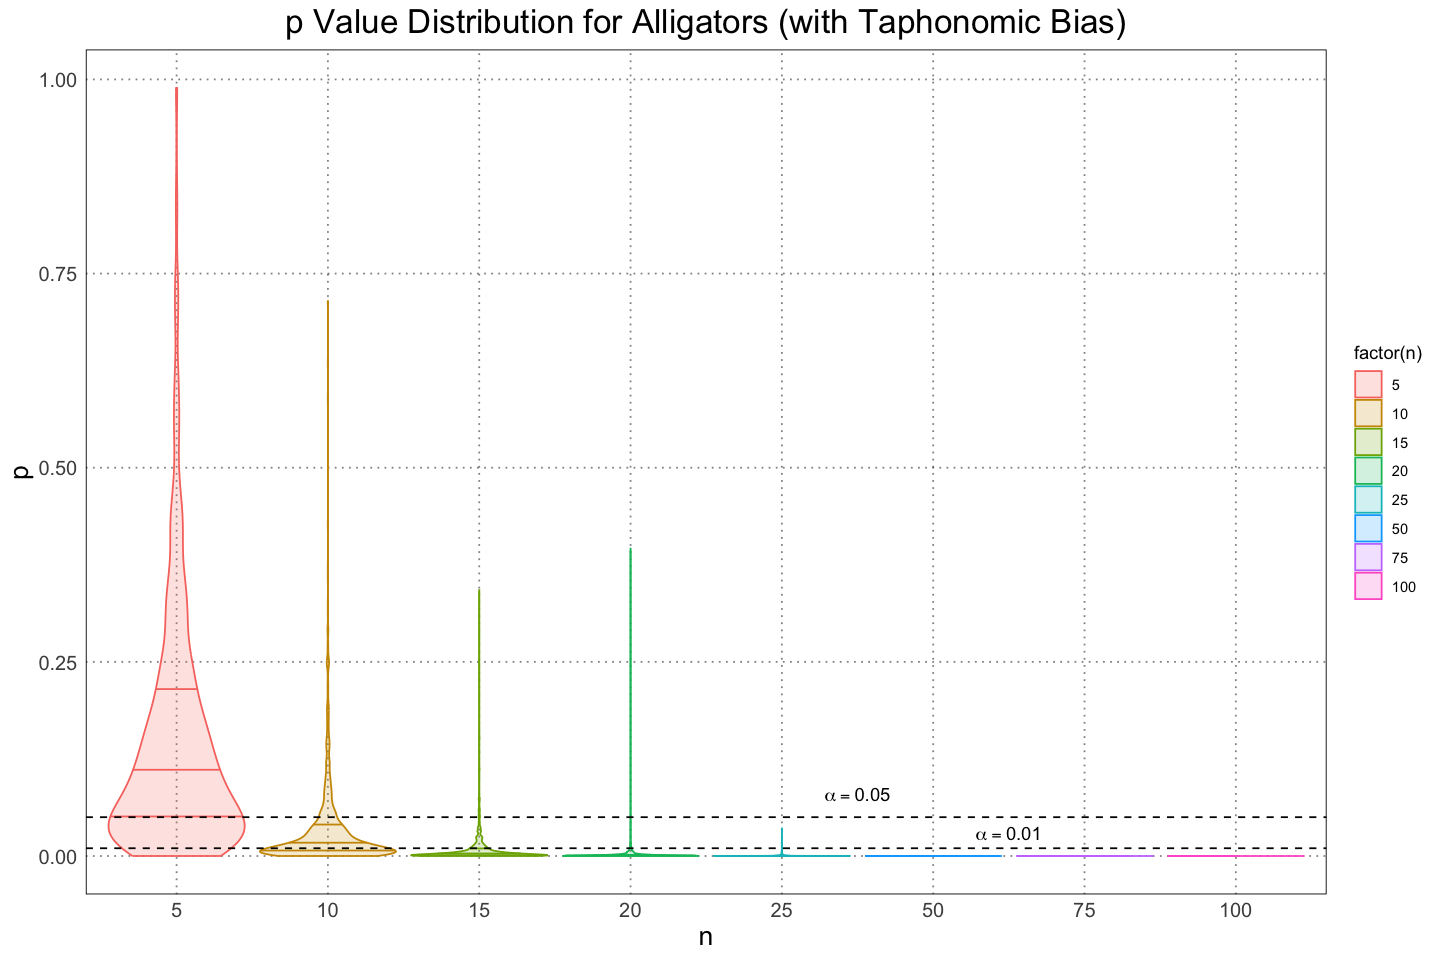

In [70]:

base_plot <- ggplot(taphonomic_bias_test_results, aes(factor(n), p)) +
    geom_violin(scale = "width", mapping = aes(colour = factor(n), fill = factor(n)), alpha = 0.2, draw_quantiles = c(0.25, 0.5, 0.75)) +
    geom_hline(yintercept = alpha, linetype = 'dashed') +
    geom_hline(yintercept = 0.01, linetype = 'dashed') +
    custom_theme() +
    labs(title = "p Value Distribution for Alligators (with Taphonomic Bias)", x = 'n', y = 'p') +
    custom_theme()

base_plot + 
    annotate('text', x = 5.5, y = 0.08, label = 'alpha == 0.05', parse = TRUE) +
    annotate('text', x = 6.5, y = 0.03, label = 'alpha == 0.01', parse = TRUE)

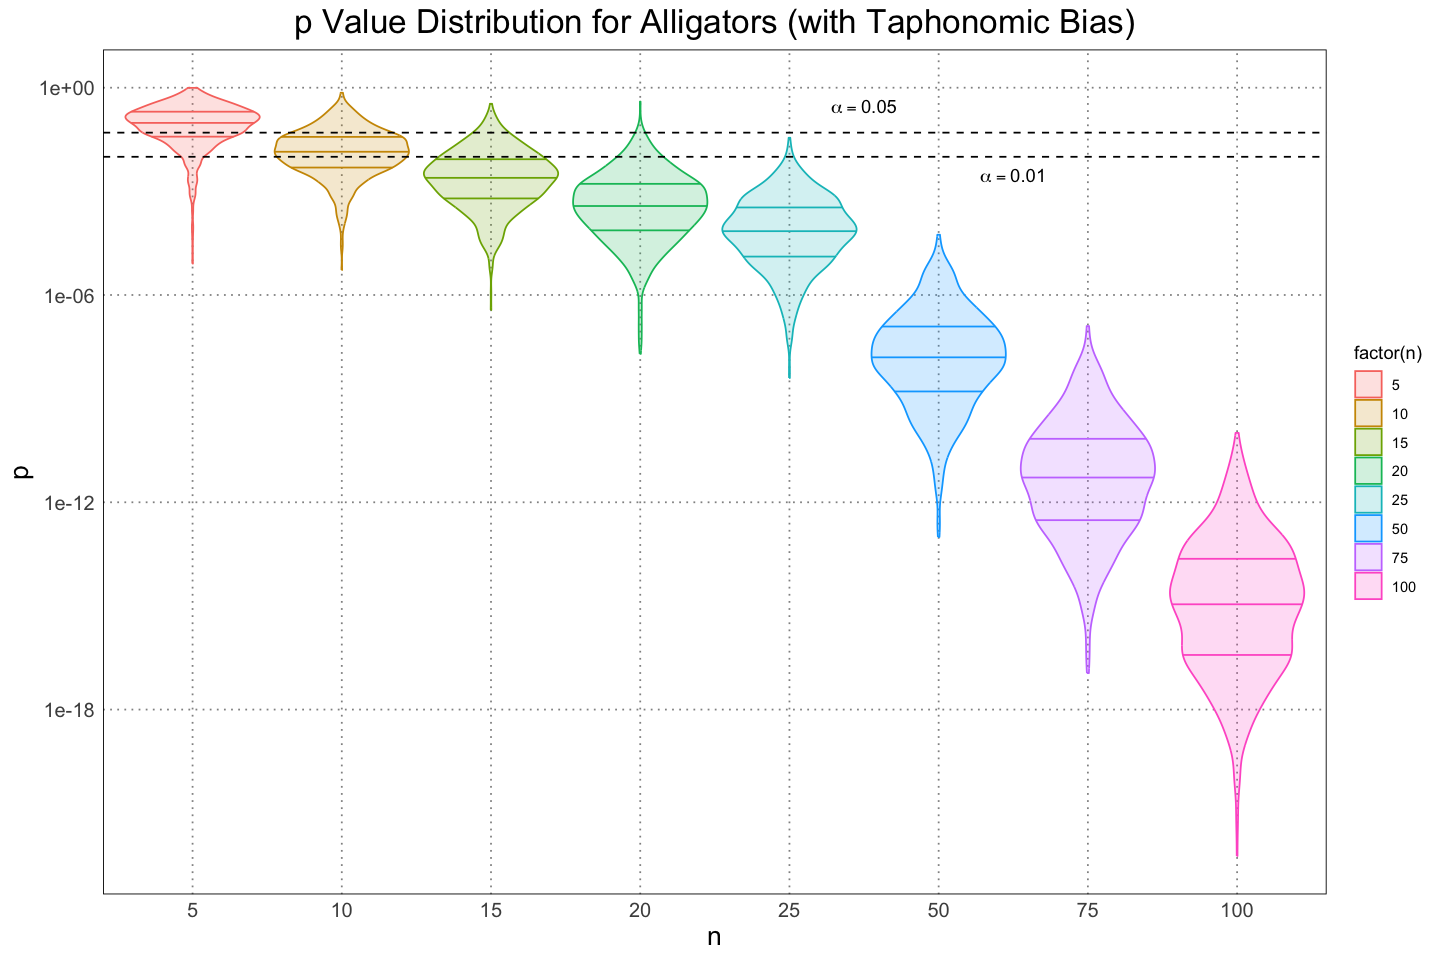

In [71]:
base_plot + 
    scale_y_continuous(trans = 'log10') +
    annotate('text', x = 5.5, y = 0.3, label = 'alpha == 0.05', parse = TRUE) + 
    annotate('text', x = 6.5, y = 0.003, label = 'alpha == 0.01', parse = TRUE)

From these, we can get an idea for the skew of the distribution as well as an idea of just how quickly the $p$ values descrease as the size of the samples increases.

## A Bayesian Perspective

In addition to the frequentist approach the authors took, we can also examine this same problem from the Bayesian perspective. For this approach, we will create a probabilitic model for the amount of sexual dimorphism displayed by each species / scenario and then generate a distribution for the amount of sexual dimorphism. 

We'll use essentially the same model for each sex and then calculate the difference in their means from the samples generated. For the prior, we are kind of cheating since we actually know the underlying size function. I'll just look at the growth curve and 'guess' that the mean is about 2.5m, but I want to put a wide prior on it so I'll say that the standard deviation for the mean is about 1 (so I am pretty confident that the mean is between 0.5 and 4m, which seems quite conservative). For the standard deviation of the standard deviation I'll use a half-normal curve with a standard deviation of 1, again just to allow the values to vary quite widely.

$$
\begin{align*}
L_M &\sim \text{Normal}(\mu_M, \sigma_M) \\
L_F &\sim \text{Normal}(\mu_F, \sigma_F) \\
\mu_M &\sim \text{Normal}(2.5, 1) \\
\sigma_M &\sim \text{HalfNormal}(1) \\
\mu_F &\sim \text{Normal}(2.5, 1) \\
\sigma_F &\sim \text{HalfNormal}(1) \\
\end{align*}
$$

Note that since the priors for the male and female sizes are identical, at the outset we are assuming that there is no dimorphism.

Before we perform the analyses for each of the different scenarios, let's go through one example in detail: looking at the difference in mean sizes for alligators and using a sample size of 100.

In [2]:
library(rstan)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: StanHeaders


rstan version 2.32.3 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)




In [25]:
model <- '
data {
    int<lower = 0> n_male;
    int<lower = 0> n_female;
    vector[n_male] male_lengths;
    vector[n_female] female_lengths;
}

parameters {
    real mu_male;
    real<lower = 0> sigma_male;
    real mu_female;
    real<lower = 0> sigma_female;
}

model {
    male_lengths ~ normal(mu_male, sigma_male);
    mu_male ~ normal(10, 15);
    sigma_male ~ normal(0, 15);

    female_lengths ~ normal(mu_female, sigma_female);
    mu_female ~ normal(10, 15);
    sigma_female ~ normal(0, 15);
}
'
n_male <- 100
n_female <- 100
data <- list(
    n_male = n_male,
    n_female = n_female,
    male_lengths = sample(alligator_male_sizes_with_noise, size = n_male),
    female_lengths = sample(alligator_female_sizes_with_noise, size = n_female)
)
dimorphism_model <- stan(model_code = model, data = data)
samples <- extract(dimorphism_model)

In [26]:
str(samples)

List of 5
 $ mu_male     : num [1:4000(1d)] 2.77 2.67 2.77 2.57 2.58 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ sigma_male  : num [1:4000(1d)] 0.872 0.726 0.877 0.882 0.875 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ mu_female   : num [1:4000(1d)] 2.31 2.4 2.34 2.27 2.31 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ sigma_female: num [1:4000(1d)] 0.636 0.551 0.561 0.589 0.618 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ lp__        : num [1:4000(1d)] -36.5 -43 -38.1 -37.6 -37.2 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


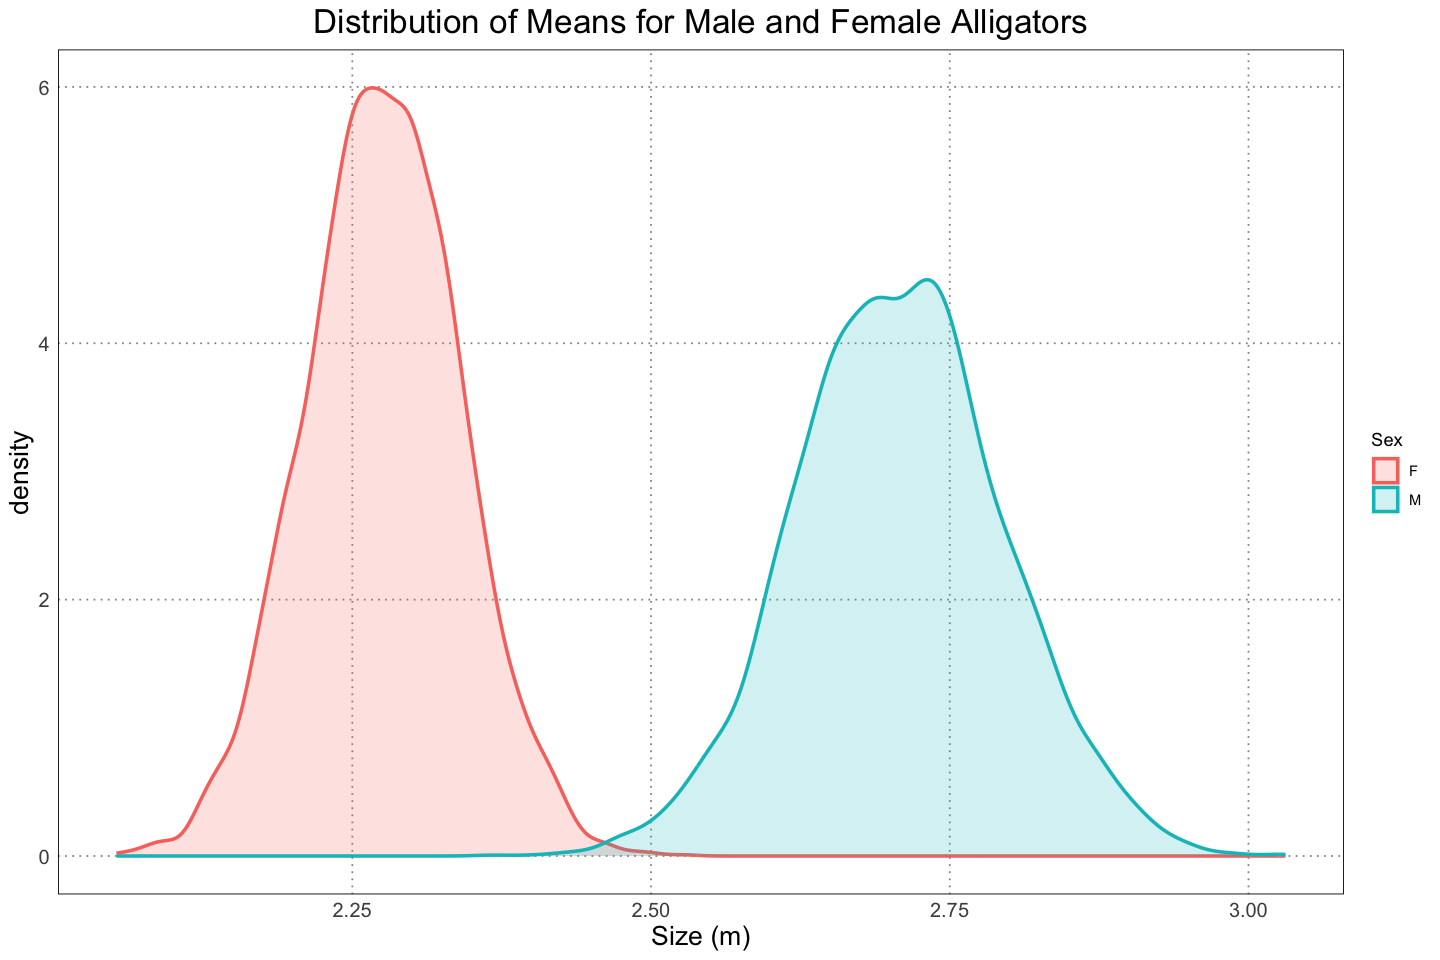

In [27]:
# display the posterior for the mean of the sizes for each sex
plot_df <- rbind(
    data.frame(
        size = c(samples$mu_male), sex = "M"
    ),
    data.frame(
        size = c(samples$mu_female), sex = "F"
    )
)
ggplot(plot_df, aes(size, colour = sex, group = sex, fill = sex)) +
    geom_density(alpha = 0.2, linewidth = 1) +
    custom_theme() +
    labs(title = 'Distribution of Means for Male and Female Alligators', x = 'Size (m)', colour = "Sex", fill = "Sex") 

Since we have the different means, we can also get their difference by simply subtracting them and plotting the results.

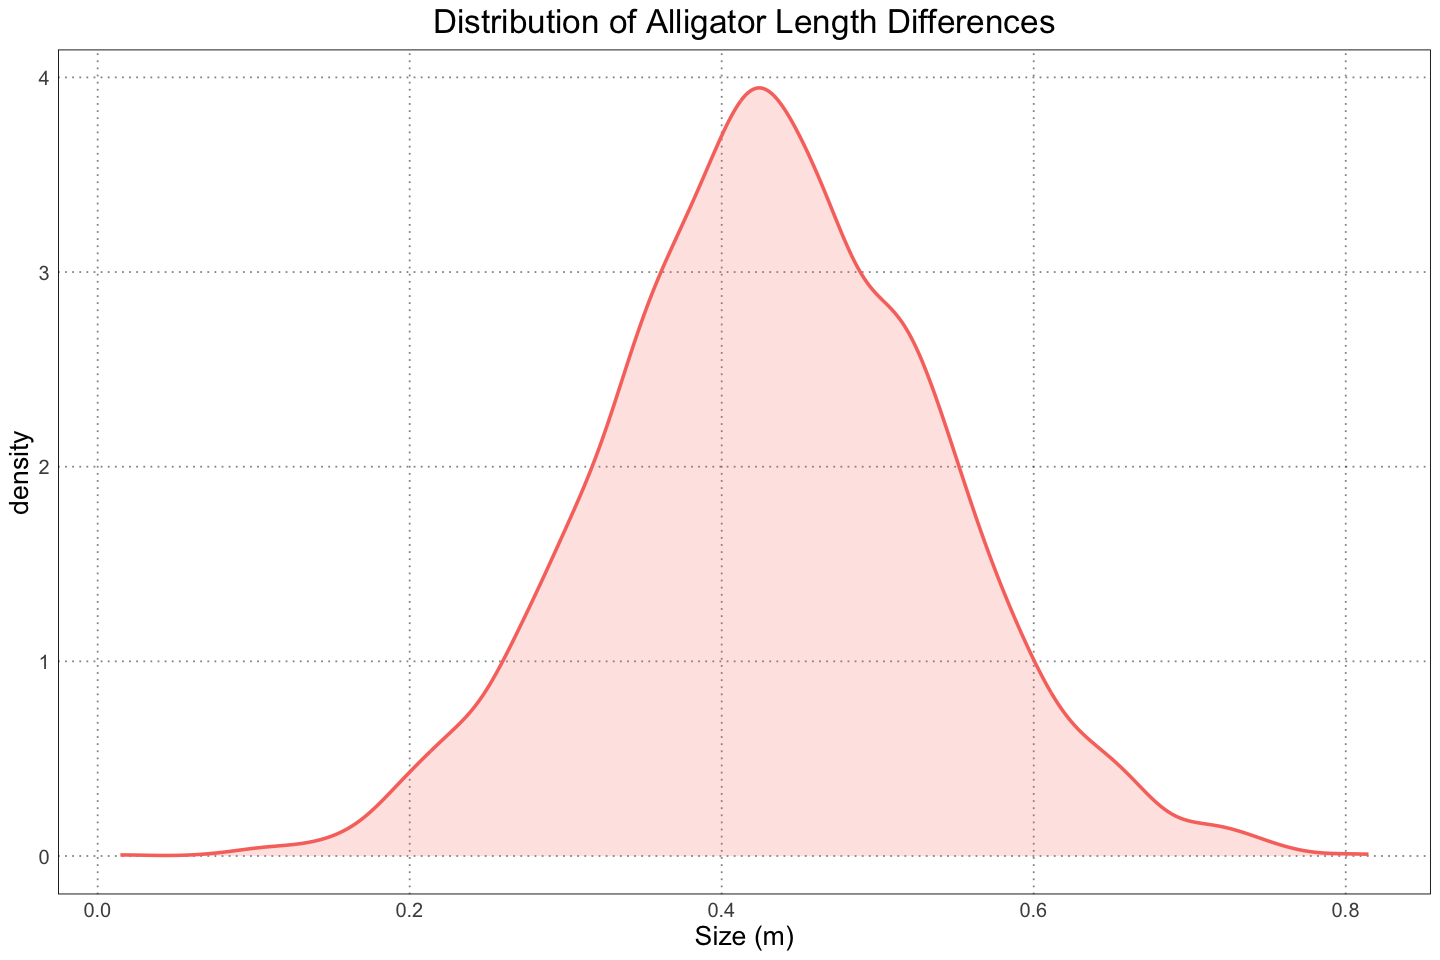

In [28]:
mu_difference <- samples$mu_male - samples$mu_female
ggplot(data.frame(size=mu_difference), aes(size, colour = "Difference", fill = "Difference")) +
    geom_density(alpha = 0.2, linewidth = 1) +
    custom_theme() +
    theme(legend.position = "none") +
    labs(title = "Distribution of Alligator Length Differences", x = "Size (m)")

As expected, we see that we are pretty sure that the male alligators are larger. In fact, we can be a bit more specific and find the quantiles for the differences. For simplicity we can use the same $\alpha = 0.05$ level, although be aware that the quantity that we calculate (the credible interval) doesn't have the same meaning as the confidence levels that we established earlier.

In [29]:
(mean_mu_difference <- mean(mu_difference))

[1] 0.4316311

In [30]:
(credible_interval <- quantile(mu_difference, c(alpha / 2, 1 - alpha / 2)))

2.5%     97.5% 
0.2216635 0.6463316

From this, we see that the mean difference is about 0.4m and we are 95% confident that the difference is between 0.2m and 0.6m. This counts as pretty strong evidence for dimorphism!

Now that we have the basic idea, let's go through and run these same calculations for the entire population, the population accounting for the population structure, and lastly accounting for taphonomic bias.

In [31]:
# entire population, with the same sample sizes as in the original paper
original_sample_results <- data.frame(differences = numeric(), n = integer())
for(n in ns) {
    data <- list(
        n_male = n,
        n_female = n,
        male_lengths = sample(alligator_male_sizes_with_noise, size = n),
        female_lengths = sample(alligator_female_sizes_with_noise, size = n)
    )
    dimorphism_model <- stan(model_code = model, data = data)
    samples <- extract(dimorphism_model)
    differences <- samples$mu_male - samples$mu_female
    original_sample_results <- rbind(original_sample_results, data.frame(differences = differences, n = n))
}

Warning message:
“Removed 393 rows containing non-finite values (`stat_density()`).”


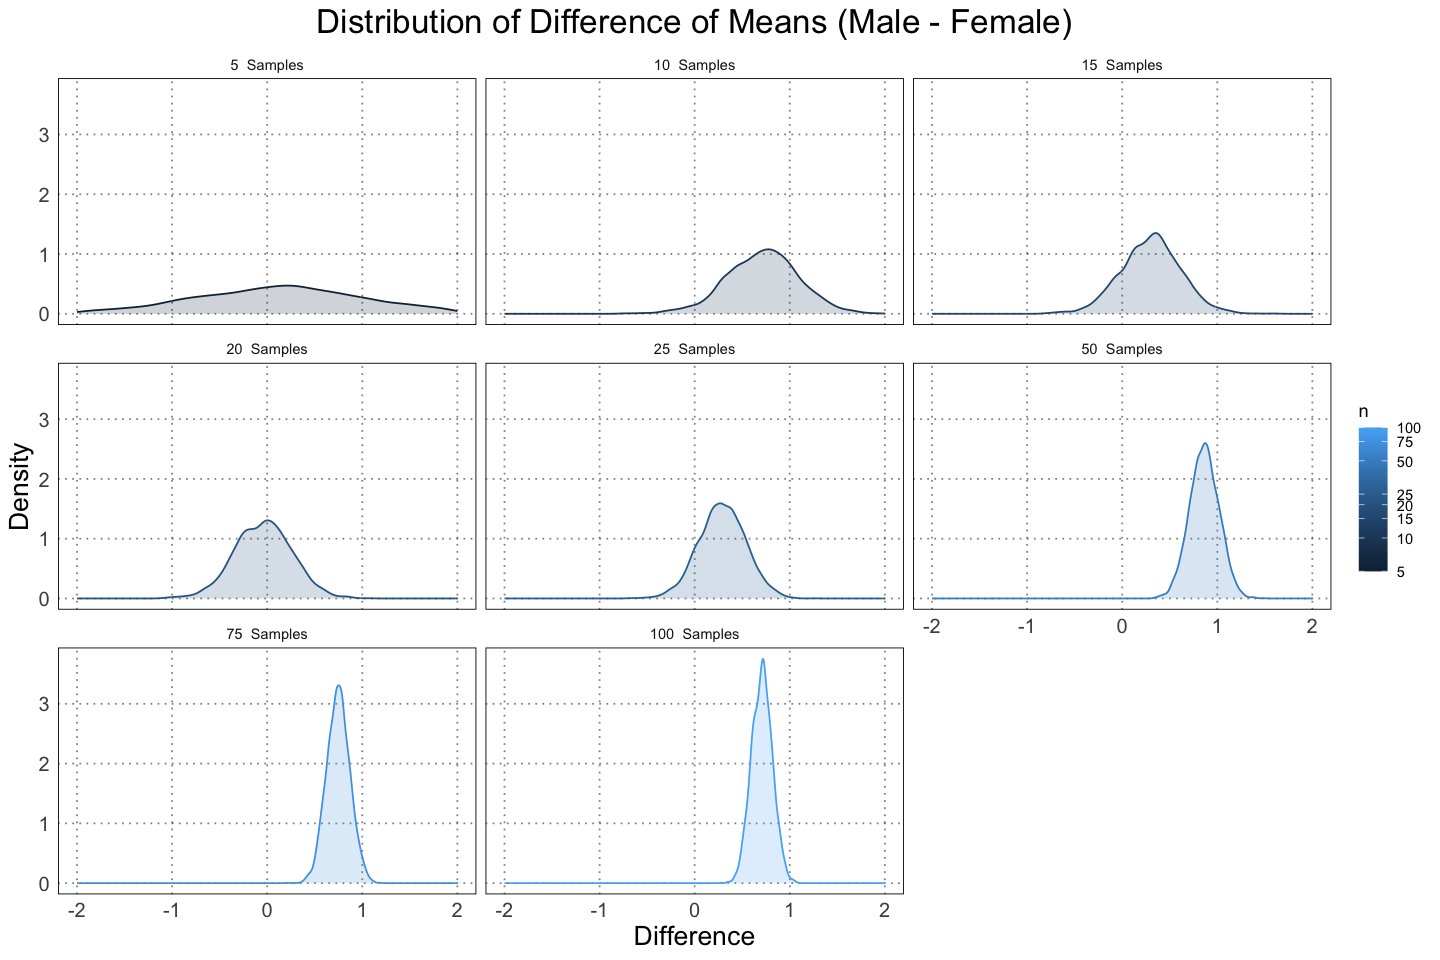

In [32]:
original_plot_df <- original_sample_results
original_plot_df$label <- factor(paste(original_plot_df$n, " Samples"), levels = paste(sort(unique(original_plot_df$n)), " Samples")) # This is just to fix the labels on the graphs
ggplot(original_plot_df, aes(differences, group = n, colour = n, fill = n)) +
    geom_density(alpha = 0.2) +
    scale_fill_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    scale_colour_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    facet_wrap(vars(label)) +
    xlim(c(-2, 2)) +
    custom_theme() +
    labs(title = "Distribution of Difference of Means (Male - Female)", x = "Difference", y = "Density")

From these graphs you can see two effects as the size of the sample increases. First, the distribution of the difference in the mean size of male and female alligators moves to the right (further from 0). This is due to the effects of the data vs. the priors that we choses. Initially, the difference between the male and females means is zero; they are the same. As such, when we only have a few pieces of data, they don't shift the distribution that much. However, once we have more data they can overwhelm the priors, leading to a shift to a larger dimorphism.

Secondly, the distributions are becoming more concentrated. This is to be expected; we are initially quite uncertain about the level of the dimorphism we expect to see, and so with data that becomes more certain.

Another way that we can examine this is by looking at the mean and 95% credible interval for each of the samples.

In [33]:
find_mean_from_sample <- function (n) {
    mean(original_sample_results[original_sample_results$n == n, ]$differences)
}

find_lower_95_ci <- function (n) {
    quantile(original_sample_results[original_sample_results$n == n, ]$differences, alpha / 2)
}

find_upper_95_ci <- function (n) {
    quantile(original_sample_results[original_sample_results$n == n, ]$differences, 1 - alpha / 2)
}

means <- sapply(ns, find_mean_from_sample)
lower <- sapply(ns, find_lower_95_ci)
upper <- sapply(ns, find_upper_95_ci)

summary_df <- data.frame(
    n = factor(ns), # because I don't care about the spacing, just the order
    mean = means,
    lower = lower,
    upper = upper
)

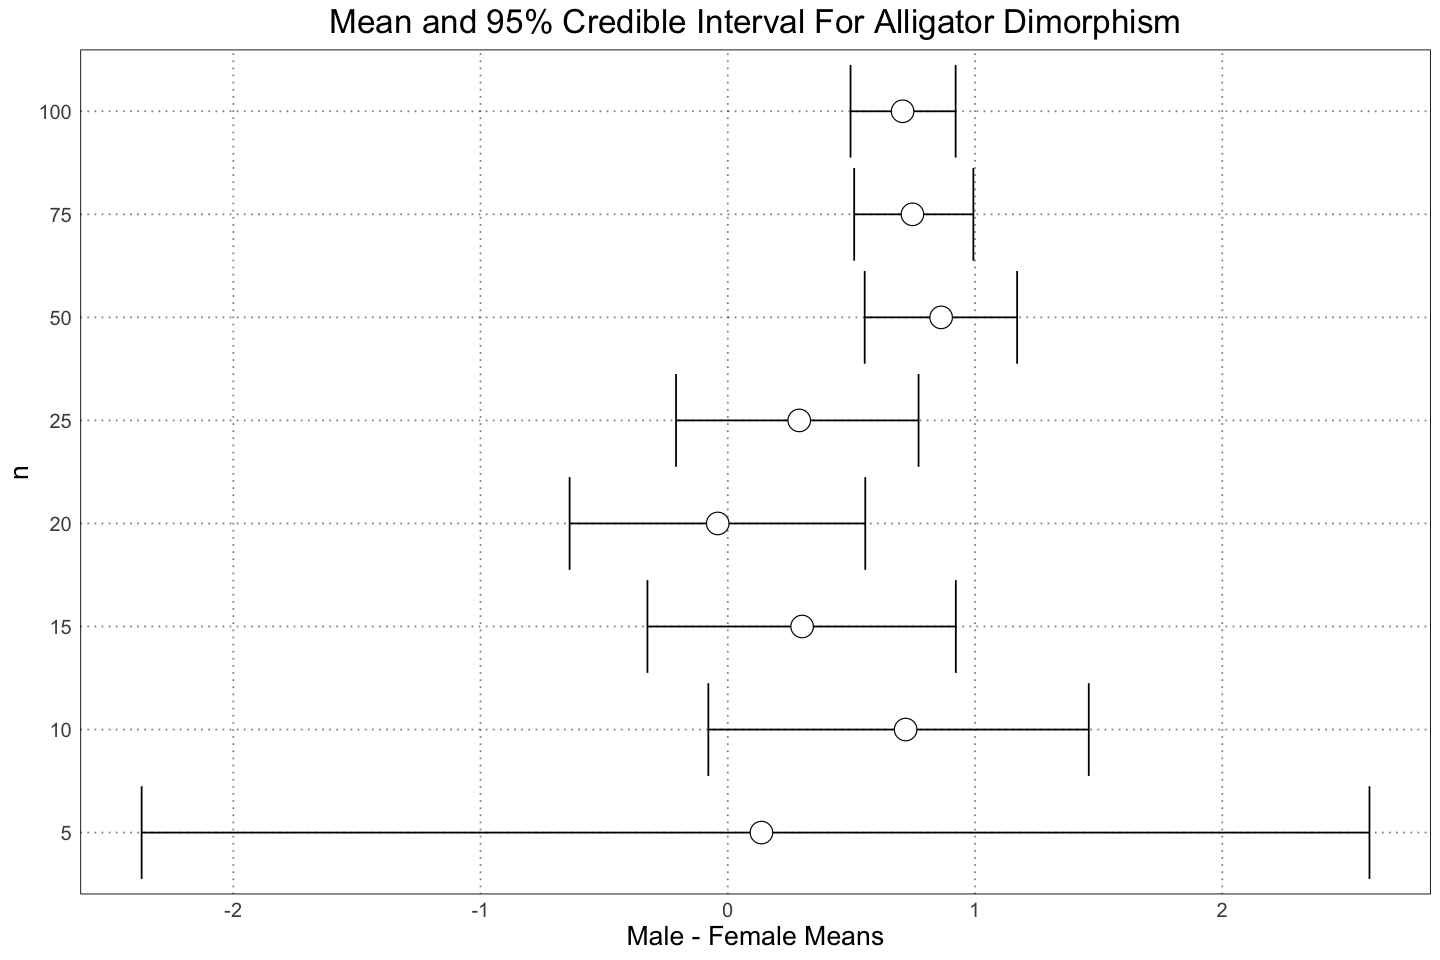

In [34]:
ggplot(summary_df, aes(y = n, group = n)) +
    geom_errorbarh(aes(xmin = lower, xmax = upper)) +
    geom_point(mapping = aes(x = mean), size = 6, shape = 21, fill = 'white') +
    custom_theme() +
    labs(title = "Mean and 95% Credible Interval For Alligator Dimorphism", y = "n", x = "Male - Female Means")

Although it's not really enough to make a solid prediction, it looks like we need somewhere between 25 - 50 individuals to be very certain of dimorphism in a population like this. However, one of the advantages of the Bayesian approach is that we 'automatically' get an idea for the magnitude of the dimorphism. For instance, even at or 15 samples we are pretty sure that there is male-larger dimorphism, with a small chance of small or negative dimorphism. Of course, we could play the same game by calculating a confidence interval in the frequentist case as well, but it drops naturally out of the method here.

Another point - there is a lot of wiggliness here, with a lot of variation between the different sample sizes. This is because for each number of samples, we are drawing a single sample of that size and then making an inference. Since we are only drawing a single sample, naturally our conclusions are strongly affected by the individual nature of that sample. This is especially noticeable with the smaller sample sizes, where the variability is greater. Interestingly, it's *not* the case with the sample size of 5 - in that case the number of data points is too small to shift the prior by much. I'm not sure what a Bayesian version of the analysis that was performed in the paper would look like; the result of the Bayesian process is a distribtuion, not a single point / value (the $p$ value), so it's unclear to me what the result of aggregating many of these posterior distributions would be. Definitely something to think about for later!

Now let's see what happens when we apply the population structure (more juveniles)!

In [35]:
# Population with population structure included (more juveniles)
population_structure_sample_results <- data.frame(differences = numeric(), n = integer())
for(n in ns) {
    data <- list(
        n_male = n,
        n_female = n,
        male_lengths = sample(alligator_male_sizes_with_noise_population_structure, size = n),
        female_lengths = sample(alligator_female_sizes_with_noise_population_structure, size = n)
    )
    dimorphism_model <- stan(model_code = model, data = data)
    samples <- extract(dimorphism_model)
    differences <- samples$mu_male - samples$mu_female
    population_structure_sample_results <- rbind(population_structure_sample_results, data.frame(differences = differences, n = n))
}

Warning message:
“Removed 74 rows containing non-finite values (`stat_density()`).”


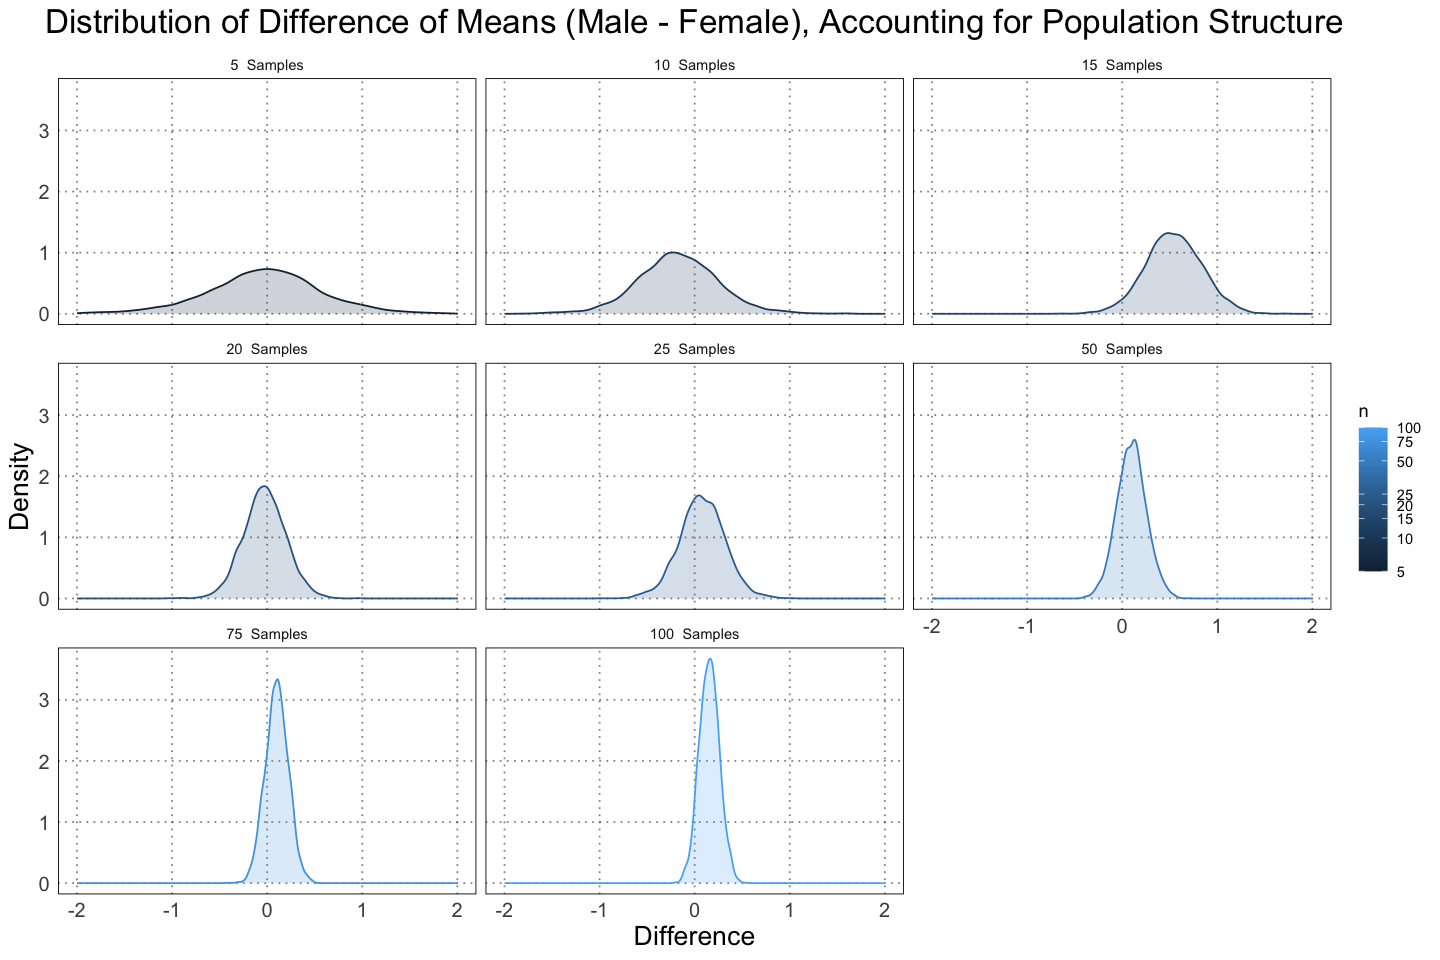

In [36]:
population_structure_plot_df <- population_structure_sample_results
population_structure_plot_df$label <- factor(paste(population_structure_plot_df$n, " Samples"), levels = paste(sort(unique(population_structure_plot_df$n)), " Samples")) # This is just to fix the labels on the graphs
ggplot(population_structure_plot_df, aes(differences, colour = n, fill = n)) +
    geom_density(alpha = 0.2) +
    scale_fill_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    scale_colour_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    facet_wrap(vars(label)) +
    xlim(c(-2, 2)) +
    custom_theme() +
    labs(title = "Distribution of Difference of Means (Male - Female), Accounting for Population Structure", x = "Difference", y = "Density")

Notice that already we can see that the difference is much closer to zero; we are more confident that there is in fact no dimorphism.

In fact, let's compare this to the version with no population structure.

Warning message:
“Removed 467 rows containing non-finite values (`stat_density()`).”


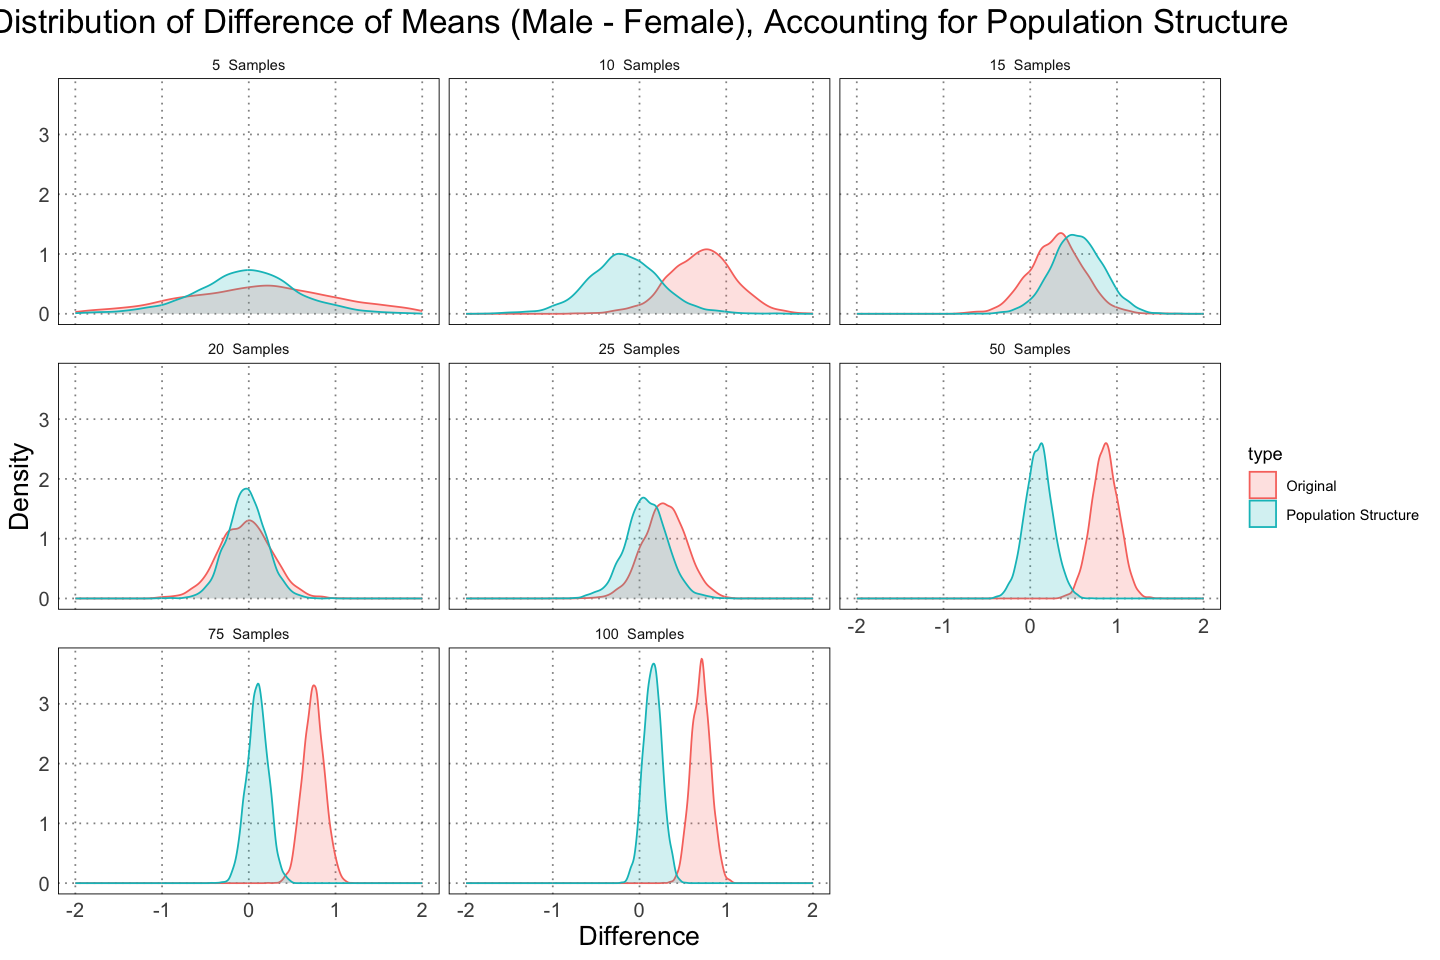

In [37]:
original_plot_df$type = "Original"
population_structure_plot_df$type = "Population Structure"
combined_plot_df <- rbind(
    original_plot_df,
    population_structure_plot_df
)

ggplot(combined_plot_df, aes(differences, colour = type, fill = type)) +
    geom_density(alpha = 0.2) +
    facet_wrap(vars(label)) +
    xlim(c(-2, 2)) +
    custom_theme() +
    labs(title = "Distribution of Difference of Means (Male - Female), Accounting for Population Structure", x = "Difference", y = "Density")

This just makes the contrast more clear. In both cases we see that we become much more confident in our answer as the amount of data increases, but we become confident in different directions - one indicating there is a large degree of dimorphism, and in the other that there is at most a small amount of dimorphism.

This is not the fault of the analysis - the samples that we are using the second case genuinely do have a smaller degree of displayed dimorphism since they include so many juveniles. In essence, they are a biased sample, and there's only so much you can do to correct something like that. Later (in a different post) I'll look at a method for determining sexual dimorphism that takes this into account.

Now, just as before, let's take a look at the credible intervals we generated.

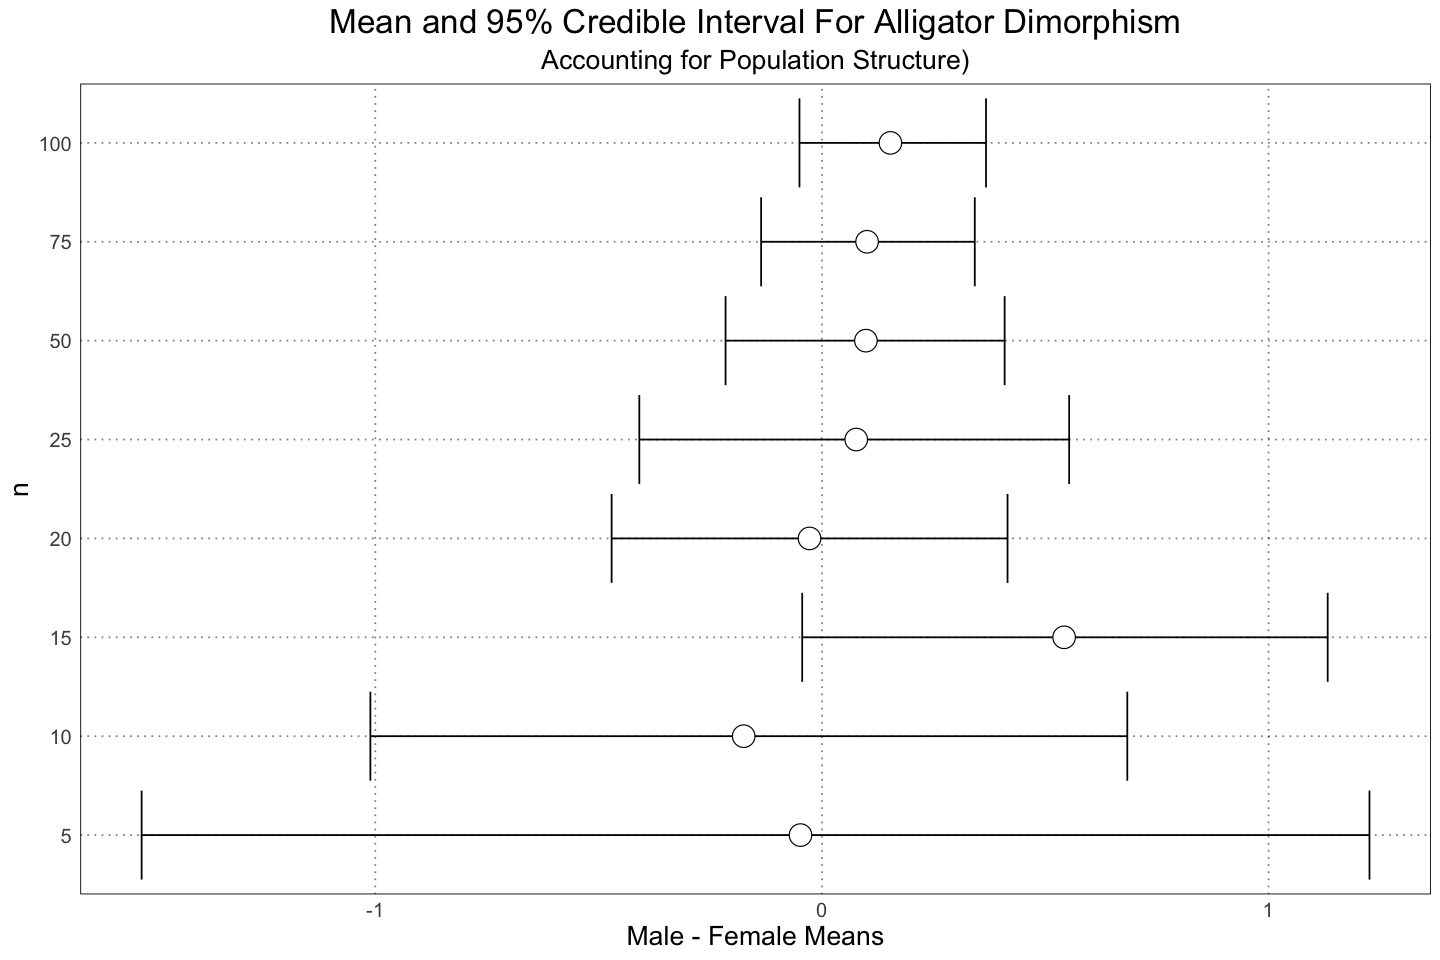

In [38]:
find_mean_from_sample <- function (n) {
    mean(population_structure_sample_results[population_structure_sample_results$n == n, ]$differences)
}

find_lower_95_ci <- function (n) {
    quantile(population_structure_sample_results[population_structure_sample_results$n == n, ]$differences, alpha / 2)
}

find_upper_95_ci <- function (n) {
    quantile(population_structure_sample_results[population_structure_sample_results$n == n, ]$differences, 1 - alpha / 2)
}

means <- sapply(ns, find_mean_from_sample)
lower <- sapply(ns, find_lower_95_ci)
upper <- sapply(ns, find_upper_95_ci)

summary_df <- data.frame(
    n = factor(ns), # because I don't care about the spacing, just the order
    mean = means,
    lower = lower,
    upper = upper
)

ggplot(summary_df, aes(y = n, group = n)) +
    geom_errorbarh(aes(xmin = lower, xmax = upper)) +
    geom_point(mapping = aes(x = mean), size = 6, shape = 21, fill = 'white') +
    custom_theme() +
    labs(title = "Mean and 95% Credible Interval For Alligator Dimorphism", subtitle="Accounting for Population Structure)", y = "n", x = "Male - Female Means")

Again, we see the same sort of results as in the earlier graph - the data is overwhelming the priors and we are becoming more confident in our results, even though in this case they are largely incorrect (in the sense that we know the truth; the analysis is just reporting on the data that we fed it).

Now let's introduce the taphonomic bias and see what that gives us!

In [39]:
# Population with taphonomic bias included (only the larger individuals)
taphonomic_bias_sample_results <- data.frame(differences = numeric(), n = integer())
for(n in ns) {
    data <- list(
        n_male = n,
        n_female = n,
        male_lengths = sample(alligator_male_sizes_taphonomic_bias, size = n),
        female_lengths = sample(alligator_female_sizes_taphonomic_bias, size = n)
    )
    dimorphism_model <- stan(model_code = model, data = data)
    samples <- extract(dimorphism_model)
    differences <- samples$mu_male - samples$mu_female
    taphonomic_bias_sample_results <- rbind(taphonomic_bias_sample_results, data.frame(differences = differences, n = n))
}

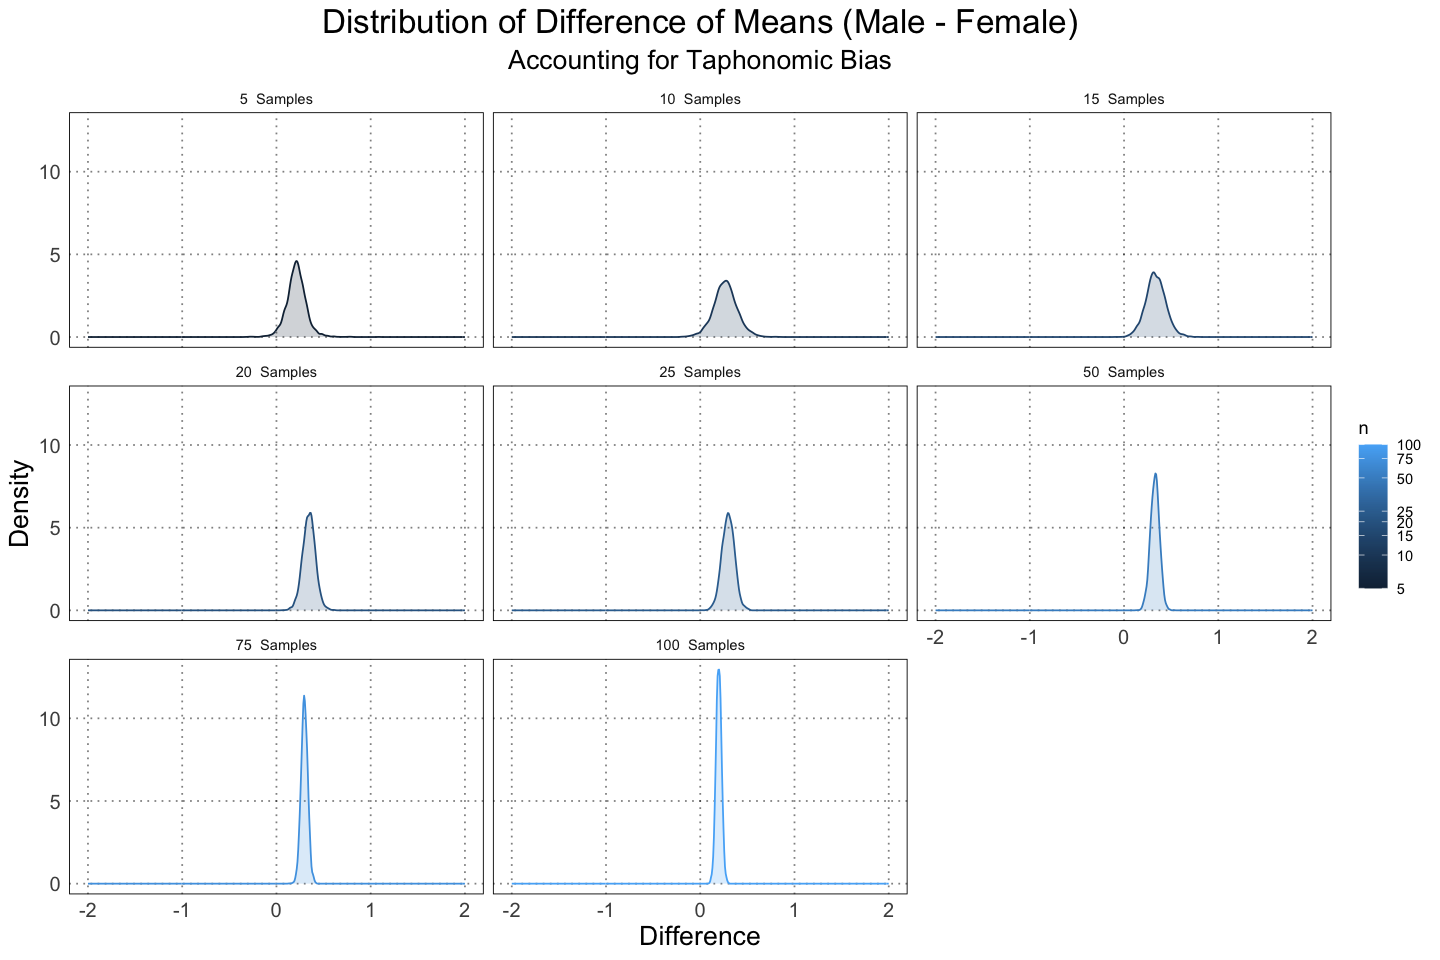

In [40]:
taphonomic_structure_plot_df <- taphonomic_bias_sample_results
taphonomic_structure_plot_df$label <- factor(paste(taphonomic_structure_plot_df$n, " Samples"), levels = paste(sort(unique(taphonomic_structure_plot_df$n)), " Samples")) # This is just to fix the labels on the graphs
ggplot(taphonomic_structure_plot_df, aes(differences, colour = n, fill = n)) +
    geom_density(alpha = 0.2) +
    scale_fill_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    scale_colour_gradient(name = "n", trans = "log", breaks = ns, labels = ns) +
    facet_wrap(vars(label)) +
    xlim(c(-2, 2)) +
    custom_theme() +
    labs(title = "Distribution of Difference of Means (Male - Female)", subtitle="Accounting for Taphonomic Bias", x = "Difference", y = "Density")

Here we see that because the data are more tightly clustered, we are immediately more confident of our results.

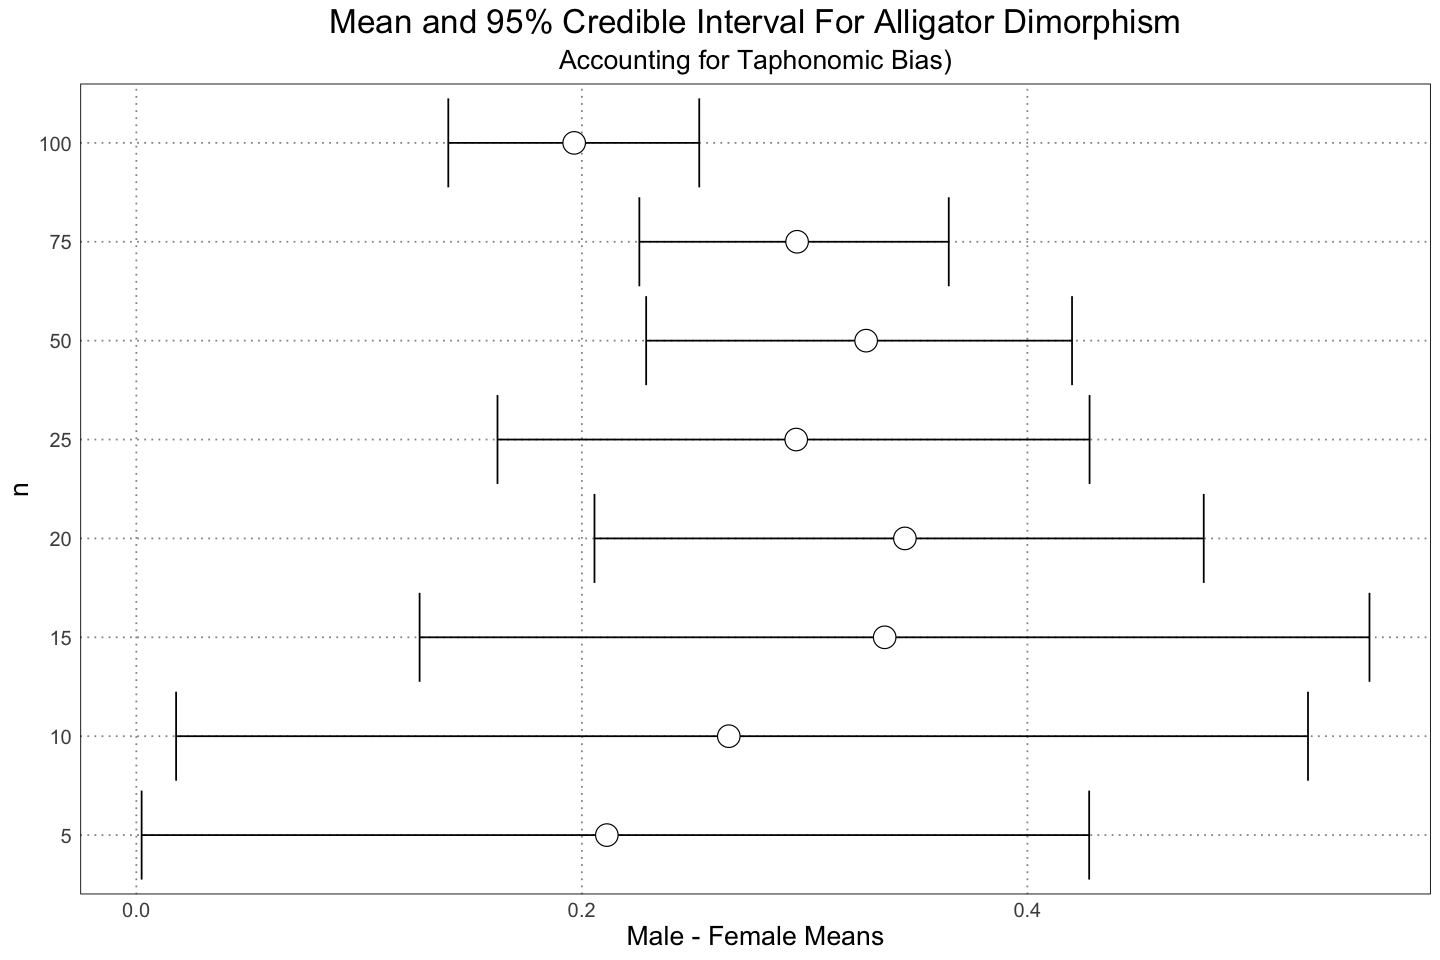

In [41]:

find_mean_from_sample <- function (n) {
    mean(taphonomic_bias_sample_results[taphonomic_bias_sample_results$n == n, ]$differences)
}

find_lower_95_ci <- function (n) {
    quantile(taphonomic_bias_sample_results[taphonomic_bias_sample_results$n == n, ]$differences, alpha / 2)
}

find_upper_95_ci <- function (n) {
    quantile(taphonomic_bias_sample_results[taphonomic_bias_sample_results$n == n, ]$differences, 1 - alpha / 2)
}

means <- sapply(ns, find_mean_from_sample)
lower <- sapply(ns, find_lower_95_ci)
upper <- sapply(ns, find_upper_95_ci)

summary_df <- data.frame(
    n = factor(ns), # because I don't care about the spacing, just the order
    mean = means,
    lower = lower,
    upper = upper
)

ggplot(summary_df, aes(y = n, group = n)) +
    geom_errorbarh(aes(xmin = lower, xmax = upper)) +
    geom_point(mapping = aes(x = mean), size = 6, shape = 21, fill = 'white') +
    custom_theme() +
    labs(title = "Mean and 95% Credible Interval For Alligator Dimorphism", subtitle="Accounting for Taphonomic Bias)", y = "n", x = "Male - Female Means")

And again, here we see the same sort of result.

In order to make some sort of reasonable comparison between the three different scenarios here, somewhat analogous to the analysis done in the paper, we can take a look at the distribution of means of the posterior distributions in the three different cases (original population, accounting for the different population structure, and accounting for taphonomic bias). This is definitely not the same thing, but it should at least give an indication of the kinds of results that we can expect.

In [122]:
types <- c("Original", "Population Structure", "Taphonomic Bias")
NUM_SAMPLES <- 1e2

generate_differences <- function(male_population, female_population, n) {
    data <- list(
        n_male = n,
        n_female = n,
        male_lengths = sample(male_population, size = n),
        female_lengths = sample(female_population, size = n)
    )
    dimorphism_model <- stan(model_code = model, data = data)
    samples <- extract(dimorphism_model)
    differences <- samples$mu_male - samples$mu_female
    return(differences)
}

combined_data <- list(
    "Original" = list(
        'M' = alligator_male_sizes_with_noise,
        "F" = alligator_female_sizes_with_noise
    ),
    "Population Structure" = list(
        "M" = alligator_male_sizes_with_noise_population_structure, 
        "F" = alligator_female_sizes_with_noise_population_structure
    ),
    "Taphonomic Bias" = list(
        "M" = alligator_male_sizes_taphonomic_bias,
        "F" = alligator_female_sizes_taphonomic_bias
    )
)

combined_df <- data.frame(
    n = integer(),
    mean = numeric(),
    type = character()
)

for (n in ns) {
    for (type in types) {
        interim_df <- data.frame(
            n = integer(NUM_SAMPLES),
            mean = numeric(NUM_SAMPLES),
            type = character(NUM_SAMPLES)
        )
        for (i in 1:NUM_SAMPLES) {
            differences <- generate_differences(
                male_population = combined_data[[type]][["M"]],
                female_population = combined_data[[type]][["F"]],
                n = n
            )
            interim_df[i, "n"] <- n
            interim_df[i, "mean"] <- mean(differences)
            interim_df[i, "type"] <- type
        }
        combined_df <- rbind(combined_df, interim_df)
    }
}

Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”
Warning messa

In [123]:
n_data <- c()
mean_data <- c()
lower_data <- c()
upper_data <- c()
type_data <- c()

for (n in ns) {
    for (type in types) {
        relevant <- combined_df[combined_df$n == n & combined_df$type == type, ]
        means <- relevant$mean
        n_data <- append(n_data, n)
        mean_data <- append(mean_data, mean(means))
        lower_data <- append(lower_data, quantile(means, alpha / 2))
        upper_data <- append(upper_data, quantile(means, 1 - alpha / 2))
        type_data <- append(type_data, type)
    }
}
plot_df <- data.frame(
    n = factor(n_data, levels = ns),
    mean = mean_data,
    lower = lower_data,
    upper = upper_data,
    type = type_data
)

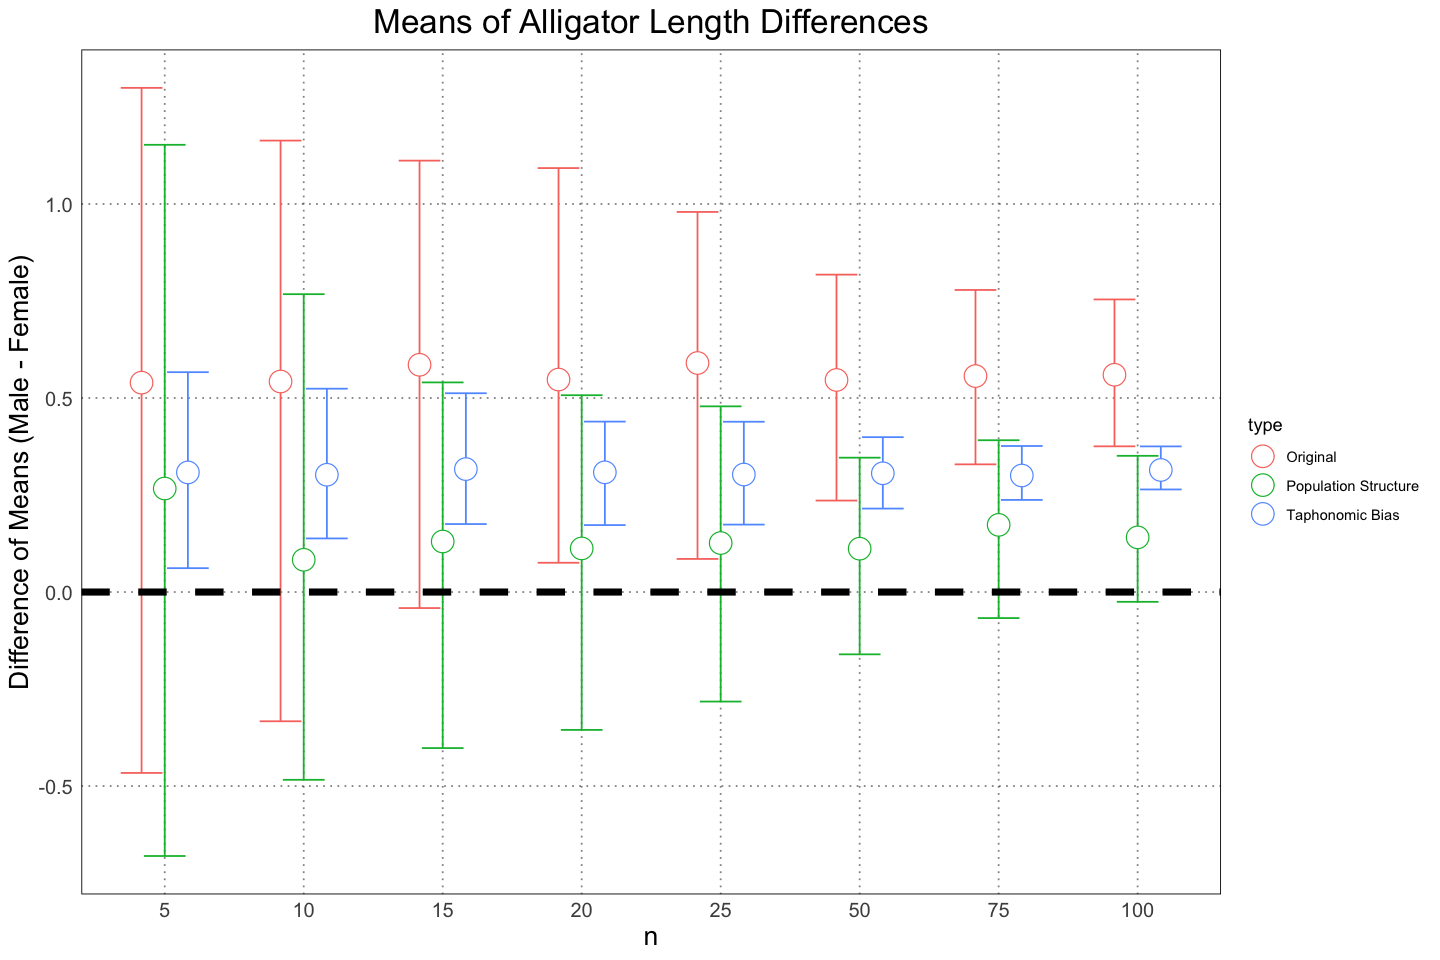

In [124]:
ggplot(plot_df, aes(x = n, colour = type)) +
    geom_errorbar(mapping = aes(ymin = lower, ymax = upper), position = position_dodge(width = 0.5)) +
    geom_point(mapping = aes(y = mean), size = 6, shape = 21, fill = 'white', position = position_dodge(width = 0.5)) +
    custom_theme() +
    geom_hline(aes(yintercept = 0), linewidth = 2, linetype = "dashed") +
    labs(
        title = "Means of Alligator Length Differences",
        x = "n",
        y = "Difference of Means (Male - Female)",
        colour = "Type"
    )

We need to be careful when interpreting this graph to remember that this is *only* looking at the mean, not the actual range or distributions. Nonetheless, it is helpful in seeing the different effects that changing the way that we look at the population has on our estimation of the level of sexual dimorphism.

While it is here to provide some sort of comparison with the same analysis in the original paper, really they are testing two different things. When the authors used a $t$ test to look for dimorphism, they were agnostic as to the actual *amount* of dimorphism. While naturally the ability to discern dimorphism goes up as the differences grow larger, the $t$ test does not reflect that. Since the null hypothesis was just that the difference was 0, test was just whether or not the amount of observed variability was surprising, *on the assumption that the difference was 0*. This could happen because there was a lack of evidence *or* because there was strong evidence that there was no effect; the test doesn't say which. We could have looked at the confidence interval to get an idea of this, but we get that same information *for free* by using the Bayesian mathod. In the Bayesian analysis, we look at the expected size of the dimorphism and then draw a conclusion (whether or not we believe that dimorphism exists / is at a large enough scale for us to care about it) from the *distribution* that we get back.

One interesting thing to note is that we really haven't nailed down what we mean by 'dimorphism'. In the analysis done in the original paper, it was just the average size difference between males and females. However, other authors (Saitta et. al. 2020) have proposed using the difference in the asymptotic sizes of males and females. None of the above approaches use this method; however, it would interesting to see how that works out. This is something I plan to revisit later.

## Conclusion

I really enjoyed reading this paper! It was clearly laid out, full of intersting ideas, and laid bare a problem with finding sexual dimorphism in a simple and easy-to-understand way. Most importantly, as I was reading this paper I was filled with all kinds of ideas for other fun things related to the ideas in it I could do! I also appreciate that the authors included the actual R code used in the paper in the Dryad data repository; it made it immediately clear how they went about getting their results. I was able to answer almost all of the questions that I had with their methods just by looking at the code. This is something that I find sorely lacking in most papers (although the problem is improving), and I hope that other authors do this as well in the future.

## Bibliography
- Brown, C. M., Evans, D. C., Campione, N. E., O’Brien, L. J., & Eberth, D. A. (2013). Evidence for taphonomic size bias in the Dinosaur Park Formation (Campanian, Alberta), a model Mesozoic terrestrial alluvial‐paralic system. Palaeogeography, Palaeoclimatology, Palaeoecology, 372, 108–122. https://doi.org/10.1016/j.palaeo.2012.06.027
- Hone, D. W. E., & Mallon, J. C. (2017). Protracted growth impedes the detection of sexual dimorphism in non-avian dinosaurs. Palaeontology, 60(4), 535–545. https://doi.org/10.1111/pala.12298
- Hone, D. W. E., & Mallon, J. C. (2018). Data from: Protracted growth impedes the detection of sexual dimorphism in non-avian dinosaurs (Version 1, p. 5230 bytes) [dataset]. Dryad. https://doi.org/10.5061/DRYAD.D5R18
- Navarro, J. L., Vignolo, P. E., Demaria, M. R., Maceira, N. O., & Martella, M. B. (n.d.). Growth curves of farmed Greater Rheas (Rhea americana albescens) from central Argentina—European Poultry Science. Retrieved December 30, 2023, from https://www.european-poultry-science.com/register-of-authors/growth-curves-of-farmed-greater-rheas-span-classws-name-rhea-americana-albescensspan-from-central-argentina,QUlEPTQyMTY0MjUmTUlEPTE2MTUxNQ.html
- Saitta, E. T., Stockdale, M. T., Longrich, N. R., Bonhomme, V., Benton, M. J., Cuthill, I. C., & Makovicky, P. J. (2020). An effect size statistical framework for investigating sexual dimorphism in non-avian dinosaurs and other extinct taxa. Biological Journal of the Linnean Society, 131(2), 231–273. https://doi.org/10.1093/biolinnean/blaa105
- Wilkinson, P. M., & Rhodes, W. E. (1997). Growth Rates of American Alligators in Coastal South Carolina. The Journal of Wildlife Management, 61(2), 397–402. https://doi.org/10.2307/3802596
- Nichols, J. D. (n.d.). Simulation of a commercially harvested alligator population in Louisiana.
- Gompertz function. (2023). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Gompertz_function&oldid=1174197005
- Von Bertalanffy function. (2023). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Von_Bertalanffy_function&oldid=1173215296